# Contexto
El presente análisis forma parte de un estudio de mercado laboral realizado por una universidad para conocer la viabilidad de crear una carrera de nivel Técnico Superior Universitario (TSU) en el área de contabilidad en la Región Sierra Sur del Estado de Oaxaca, México.

Para ello se realizó una encuesta de 15 preguntas a 71 empresas de la zona con el fin de conocer sus principales necesidades con respecto al área contable y de esta manera determinar si existe una demanda laboral para este perfil y las habilidades más importantes con las que debe contar un TSU en el área de contabilidad para ser competitivo en el mercado.

Este análisis se compone de 4 secciones que incluyen un análisis general y tres preguntas de investigación. 

Las secciones de este estudio son las siguientes:
* Análisis de las expectativas económicas de las empresas
* ¿Cómo valoran las empresas el papel que un contador público desempeña en su organización?
* ¿Existe demanda en el mercado laboral para los egresados Licenciatura en Contaduría de la Universidad Tecnológica de la Sierra Sur de Oaxaca (UTSSO)?
* ¿Cuáles son los conocimientos y las habilidades que les permitirán a los egresados de la Licenciatura en Contaduría de la UTSSO, ser más competitivos en el mercado laboral?

# Cargar librerías

In [134]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import squarify
import matplotlib.patheffects as PathEffects
import seaborn as sns
from wordcloud import WordCloud
sns.set_style("white")
palette = ["#053c5e", "#1d3958", "#353652", 
           "#4c334d", "#643047", "#7c2e41", 
           "#942b3b", "#ab2836", "#c32530", 
           "#db222a"]
sns.set_palette(palette=palette)

# Limpieza de datos

In [135]:
# Leyendo los datos
# Se muestra el dataset en tres partes para
# poder visualizar mejor su estructura
# Primera parte
df = pd.read_csv("Estudio_de_Mercado_Laboral.csv")
df.iloc[:3, :7]

,Marca temporal,Lugar y fecha,Nombre de la empresa:,Giro,Dirección,Teléfono,Correo electrónico
0,1/31/2023 20:00:37,Villa Sola de Vega a 31 de enero del 2023,Regalos FIESTA,Venta de regalos y productos de temporada,Independencia esq. Fco. I. Madero,2218639653,liazoefiesta@gmail.com
1,2/1/2023 9:20:48,SAN GABRIEL MIXTEPEC (01/02/2023),LABORATORIO DE ANALISIS CLINICOS DEL CARMEN,LABORATORIO MEDICO Y DE DIAGNOSTICOD PERTENECI...,CORREGIDORA S/N\nSAN GABRIEL MIXTEPEC,9541193559,ines_jimenez_79@hotmail.com
2,2/1/2023 12:27:24,Villa sola de Vega 01/02/23,Cremería Juquilita,Alimentos,Zaragoza s/n barrio la soledad villa sola de V...,9513226189,riosrodriguezantoniodejesus@gmail.com


In [136]:
# Segunda parte
df.iloc[:3, 7:27]

,1. ¿Cuenta con los servicios de un contador público?,2. ¿ Qué tan importante considera contratar los servicios de un contador público?,3. ¿Cuál es el estado laboral?,4. ¿Cómo visualiza su periodo económico en cuanto a inversión y capital?,5. ¿Cuál es su expectativa en cuanto al futuro próximo?,6. ¿Qué retos y problemas espera enfrentar?,7. ¿Cuáles son sus probabilidades de contratación?,"8. Número de Personal por puesto que contrataría. \n(Seleccione por cada área de conocimiento el número de personal que contraría, en caso de no contratar marque ""0"".) [Administración y recursos Humanos]","8. Número de Personal por puesto que contrataría. \n(Seleccione por cada área de conocimiento el número de personal que contraría, en caso de no contratar marque ""0"".) [Contabilidad y Finanzas]","8. Número de Personal por puesto que contrataría. \n(Seleccione por cada área de conocimiento el número de personal que contraría, en caso de no contratar marque ""0"".) [Producción]","8. Número de Personal por puesto que contrataría. \n(Seleccione por cada área de conocimiento el número de personal que contraría, en caso de no contratar marque ""0"".) [Ventas y Marketing]","8. Número de Personal por puesto que contrataría. \n(Seleccione por cada área de conocimiento el número de personal que contraría, en caso de no contratar marque ""0"".) [Otro]","9. Número de Personal por nivel educativo que contraría.\n(Seleccione por cada nivel educativo el número de personal que contraría, en caso de no contratar marque ""0"".) [Educación Inicial]","9. Número de Personal por nivel educativo que contraría.\n(Seleccione por cada nivel educativo el número de personal que contraría, en caso de no contratar marque ""0"".) [Educación primaria]","9. Número de Personal por nivel educativo que contraría.\n(Seleccione por cada nivel educativo el número de personal que contraría, en caso de no contratar marque ""0"".) [Educación secundaria]","9. Número de Personal por nivel educativo que contraría.\n(Seleccione por cada nivel educativo el número de personal que contraría, en caso de no contratar marque ""0"".) [Educación media superior]","9. Número de Personal por nivel educativo que contraría.\n(Seleccione por cada nivel educativo el número de personal que contraría, en caso de no contratar marque ""0"".) [Educación superior nivel Técnico]","9. Número de Personal por nivel educativo que contraría.\n(Seleccione por cada nivel educativo el número de personal que contraría, en caso de no contratar marque ""0"".) [Maestría]","9. Número de Personal por nivel educativo que contraría.\n(Seleccione por cada nivel educativo el número de personal que contraría, en caso de no contratar marque ""0"".) [Doctorado]","9. Número de Personal por nivel educativo que contraría.\n(Seleccione por cada nivel educativo el número de personal que contraría, en caso de no contratar marque ""0"".) [Otro]"
0,No,Poco importante,a) Empleado autónomo independiente.,3.Crecerá su capital más del 20%,3. Muy positivo,1.Competencia en los servicios,1. Contratará personas especializadas en conta...,0.0,1.0,0,1,2,0.0,0,1,2.0,1.0,0.0,0.0,0.0
1,Sí,Muy importante,a) Empleado autónomo independiente.,4. Crecerá su capital entre un 10-20%,2. Más o menos positivo,1.Competencia en los servicios,2. Contratará personal administrativo,1.0,1.0,1,1,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,No,Importante,NaN,1.Tenderá a crecer,3. Muy positivo,1.Competencia en los servicios,1. Contratará personas especializadas en conta...,0.0,1.0,0,1,0,0.0,0,0,1.0,1.0,0.0,0.0,0.0


In [137]:
# Tercera parte
df.iloc[:3, 27:]

,10. Habilidades y actitudes del TSU en Contaduría Pública. [Comunicación oral y escrita],10. Habilidades y actitudes del TSU en Contaduría Pública. [Capacidad para el trabajo en equipo],10. Habilidades y actitudes del TSU en Contaduría Pública. [Facilidad para relacionarse],10. Habilidades y actitudes del TSU en Contaduría Pública. [Habilidad para tomar de decisiones],10. Habilidades y actitudes del TSU en Contaduría Pública. [Capacidad de Liderazgo],10. Habilidades y actitudes del TSU en Contaduría Pública. [Organización],10. Habilidades y actitudes del TSU en Contaduría Pública. [Compromiso],10. Habilidades y actitudes del TSU en Contaduría Pública. [Uso de la tecnología para resolver problemas],10. Habilidades y actitudes del TSU en Contaduría Pública. [Análisis e interpretación de de información financiera],10. Habilidades y actitudes del TSU en Contaduría Pública. [Perspectica de leyes y normas contables],...,15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Manejo de libros contables],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Elaboración y control de estados financieros],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Cumplimiento de obligaciones fiscales],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Transacciones contables],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Proporcionar Asesoría],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Informes financieros],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Auditorías a empresas o particulares],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Elaborar inventarios],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Utilizar un software],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Elaborar informe tributario]
0,.,.,.,.,.,.,.,.,NaN,.,...,3.0,3.0,3.0,3.0,4.0,4.0,2.0,3.0,4.0,4.0
1,.,.,.,.,.,.,.,NaN,NaN,.,...,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# Las primeras columnas contienen información 
# poco relevante para nuestro análisis
# por lo que se eliminarán
data = df.drop(columns=df.iloc[:3, :7])

# Se eliminan también las filas en blanco
data = data.drop(index=data[data.isnull().all(axis=1)].index)

data.head(3)

,1. ¿Cuenta con los servicios de un contador público?,2. ¿ Qué tan importante considera contratar los servicios de un contador público?,3. ¿Cuál es el estado laboral?,4. ¿Cómo visualiza su periodo económico en cuanto a inversión y capital?,5. ¿Cuál es su expectativa en cuanto al futuro próximo?,6. ¿Qué retos y problemas espera enfrentar?,7. ¿Cuáles son sus probabilidades de contratación?,"8. Número de Personal por puesto que contrataría. \n(Seleccione por cada área de conocimiento el número de personal que contraría, en caso de no contratar marque ""0"".) [Administración y recursos Humanos]","8. Número de Personal por puesto que contrataría. \n(Seleccione por cada área de conocimiento el número de personal que contraría, en caso de no contratar marque ""0"".) [Contabilidad y Finanzas]","8. Número de Personal por puesto que contrataría. \n(Seleccione por cada área de conocimiento el número de personal que contraría, en caso de no contratar marque ""0"".) [Producción]",...,15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Manejo de libros contables],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Elaboración y control de estados financieros],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Cumplimiento de obligaciones fiscales],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Transacciones contables],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Proporcionar Asesoría],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Informes financieros],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Auditorías a empresas o particulares],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Elaborar inventarios],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Utilizar un software],15. Seleccione la función y la frecuencia expresada en número sobre la realización de funciones en la organizaciones. [Elaborar informe tributario]
0,No,Poco importante,a) Empleado autónomo independiente.,3.Crecerá su capital más del 20%,3. Muy positivo,1.Competencia en los servicios,1. Contratará personas especializadas en conta...,0.0,1.0,0,...,3.0,3.0,3.0,3.0,4.0,4.0,2.0,3.0,4.0,4.0
1,Sí,Muy importante,a) Empleado autónomo independiente.,4. Crecerá su capital entre un 10-20%,2. Más o menos positivo,1.Competencia en los servicios,2. Contratará personal administrativo,1.0,1.0,1,...,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0
2,No,Importante,NaN,1.Tenderá a crecer,3. Muy positivo,1.Competencia en los servicios,1. Contratará personas especializadas en conta...,0.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Algunas preguntas tienen estructuras distintas. Las primeras 7 son similares entre sí por lo que pueden agruparse en un mismo dataframe, sin embargo, el resto deben ser guardadas en un dataset distinto cada una.

### Preguntas 1 a la 7

In [139]:
# Tomando las primeras 7 preguntas y se guardan en un DataFrame
df_7 = data.iloc[:, :7]

# Se cambian los nombres de las columnas para que
# sean más sencillos de utilizar.
# Se especifica el número de pregunta en el nombre
df_7.columns = ["Tiene_contador_1", "Importancia_de_contador_2",
                "Situacion_laboral_3", "Expectativa_crecimeinto_capital_4",
                "Expectativa_corto_plazo_5", "Retos_futuros_6",
                "Intencion_de_contratacion_7"]

# Cambiar los valores de las respuestas por unas 
# que sean más fáciles de usar en las visualizaciones
# Pregunta 3
df_7["Situacion_laboral_3"] = df_7.Situacion_laboral_3.replace(
    to_replace=["a) Empleado autónomo independiente.", 
                "b) Empleado asalariado con contrato laboral fijo o eventual.",
                "c) Empleado asalariado sin contrato laboral."], 
    value=["Autónomo independiente", "Contrato fijo o eventual",
           "Asalariado sin contrato"])
# Debido a que se cuenta con pocos datos, los valores 
# nulos se imputarán para no eliminar otros valores.
df_7 = df_7.fillna("No respondió")

# Pregunta 4
df_7["Expectativa_crecimeinto_capital_4"] = df_7.Expectativa_crecimeinto_capital_4.replace(
    to_replace=["1.Tenderá a crecer", "2. Mantendrá estable su capital",
                "3.Crecerá su capital más del 20%", "4. Crecerá su capital entre un 10-20%",
                "5. No sabe"],
    value=["Crecerá menos de 10%", "Se mantendrá constante",
           "Crecerá más de 20%", "Crecerá entre 10% y 20%",
           "No sabe"])

# Pregunta 5
df_7["Expectativa_corto_plazo_5"] = df_7.Expectativa_corto_plazo_5.replace(
    to_replace=["1. Con algunos problemas", "2. Más o menos positivo",
                "3. Muy positivo", "4. No sabe"], 
    value=["Negativo", "Positivo", "Muy positivo", "No sabe"])

#Pregunta 6
df_7["Retos_futuros_6"] = df_7.Retos_futuros_6.replace(
    to_replace=["1.Competencia en los servicios", 
                "2.Falta de entrenamiento en los empleados",
                "3. Problemas con los clientes",
                "4. Financieros: créditos, deudas, etc.",
                "5. Tecnológicos: falta de competitividad"],
    value=["Mucha competencia", "Empleados poco calificados",
           "Clientes Problemáticos", "Problemas financieros",
           "Obsolescencia tecnológica"])

# Pregunta 7
df_7["Intencion_de_contratacion_7"] = df_7.Intencion_de_contratacion_7.replace(
    to_replace=["1. Contratará personas especializadas en contaduría Pública",
                "2. Contratará personal administrativo",
                "3. Mantendrá el mismo número de empleados", "No respondió",
                "4. No sabe"],
       value=["contadores públicos", "Personal Administrativo",
              "No contratará personal nuevo", "No sabe", "No sabe"])

df_7.head(2)

,Tiene_contador_1,Importancia_de_contador_2,Situacion_laboral_3,Expectativa_crecimeinto_capital_4,Expectativa_corto_plazo_5,Retos_futuros_6,Intencion_de_contratacion_7
0,No,Poco importante,Autónomo independiente,Crecerá más de 20%,Muy positivo,Mucha competencia,contadores públicos
1,Sí,Muy importante,Autónomo independiente,Crecerá entre 10% y 20%,Positivo,Mucha competencia,Personal Administrativo


### Pregunta 8

In [140]:
# Se toma la pregunta 8 y se guarda en un DataFrame
df_8 = data.iloc[:, 7:12]

# Se cambian los nombres de las columnas para que
# sean más sencillos de utilizar.
df_8.columns = ["Administración_y_RH", "Contabilidad_Finanzas",
                "Produccion", "Ventas_Marketing", "Otro"]

# Adecuar los valores de las respuestas para que 
# sean más fáciles de usar en las visualizaciones
df_8["Produccion"] = df_8.Produccion.replace(
    to_replace=["0", "1", "2", "3", "Más de 5", "4"], 
    value=[0, 1, 2, 3, 5, 4])
df_8["Ventas_Marketing"] = df_8.Ventas_Marketing.replace(
    to_replace=["1", "0", "Más de 5", "2", "3"], 
    value=[1, 0, 5, 2, 3])
df_8["Otro"] = df_8.Otro.replace(
    to_replace=["2", "0", "1", "4", "Más de 5", "3"], 
    value=[2, 0, 1, 4, 5, 3])

# Debido a que se cuenta con pocos datos, los valores 
# nulos se imputarán para no eliminar otros valores.
# El valor con los que se imputarán será 0, ya que 
# tomando en cuenta que los encuestados respondieron algunas 
# opciones y otras las dejaron en blanco se puede entender que 
# no responder es una forma de hacer saber que su respuesta es 0
df_8 = df_8.fillna(0)
df_8 = df_8.astype("int")

df_8.head(2)

,Administración_y_RH,Contabilidad_Finanzas,Produccion,Ventas_Marketing,Otro
0,0,1,0,1,2
1,1,1,1,1,0


### Pregunta 9

In [141]:
# Se toma la pregunta 9 y se guarda en un DataFrame
df_9 = data.iloc[:, 12:20]

# Se cambian los nombres de las columnas para que
# sean más sencillos de utilizar.
df_9.columns = ["Educación_Inicial", "Primaria", "Secundaria",
                "Medio_Superior", "Superior_Nivel_Tecnico",
                "Maestría", "Doctorado", "Otro"]

# Adecuar los valores de las respuestas para que 
# sean más fáciles de usar en las visualizaciones
df_9 = df_9.replace(to_replace="6 o más.", value=6)

# Como se mencionó en el apartado anterior, los valores nulos
# se sustituirán por 0
df_9 = df_9.fillna(0)
df_9 = df_9.astype("int")

df_9.head(2)

,Educación_Inicial,Primaria,Secundaria,Medio_Superior,Superior_Nivel_Tecnico,Maestría,Doctorado,Otro
0,0,0,1,2,1,0,0,0
1,0,0,0,1,1,0,0,0


### Pregunta 10

In [142]:
# Se toma la pregunta 10 y se guarda en un DataFrame
df_10 = data.iloc[:, 20:31]

# Se cambian los nombres de las columnas para que
# sean más sencillos de utilizar.
df_10.columns=["Comunicación_oral_y_escrita", "Trabajo_en_equipo",
               "Facilidad_para_relacionarse", "Toma_de_decisiones", 
               "Capacidad_de_Liderazgo", "Organización", "Compromiso",
               "Uso_de_TIC", "Manejo_de_info_finan", 
               "Conocimiento_de_leyes_y_normas_contables", "Otro"]

# Adecuar los valores de las respuestas para que 
# sean más fáciles de usar en las visualizaciones
df_10 = df_10.replace(to_replace=".", value=1)

# Como se mencionó en el anteriormente, 
# los valores nulos se sustituirán por 0
df_10 = df_10.fillna(0)
df_10 = df_10.astype("int")

df_10.head(2)

,Comunicación_oral_y_escrita,Trabajo_en_equipo,Facilidad_para_relacionarse,Toma_de_decisiones,Capacidad_de_Liderazgo,Organización,Compromiso,Uso_de_TIC,Manejo_de_info_finan,Conocimiento_de_leyes_y_normas_contables,Otro
0,1,1,1,1,1,1,1,1,0,1,1
1,1,1,1,1,1,1,1,0,0,1,0


### Pregunta 11

In [143]:
# Se toma la pregunta 11 y se guarda en un DataFrame
df_11 = data.iloc[:, 31:33]

# Se cambian los nombres de las columnas para que
# sean más sencillos de utilizar.
df_11.columns = ["Utiliza_Software_Contable", "Nombre_Software"]

# Los valores nulos de la primera columna se reemplazarán 
# con el valor "No", siguiendo la misma lógica antes explicada.
df_11.Utiliza_Software_Contable.fillna("No", inplace=True)

# Los valores nulos de la segunda columna serán reemplazados según
# la respuesta de la primera columna. Si la respuesta es sí, se sabe
# que usan software contable pero no se sabe cuál, así que se sustituirán
# por el valor "No contestó"
# Si la respuesta es no, entonces el valor será "Ninguno"
df_11["Nombre_Software"] = df_11["Nombre_Software"]\
    .fillna(df_11["Utiliza_Software_Contable"]\
    .map({"Sí": "No contestó", "No": "Ninguno"}))

# Adecuar los valores de las respuestas para que 
# sean más fáciles de usar en las visualizaciones
df_11.loc[df_11["Utiliza_Software_Contable"]=="No", "Nombre_Software"] = "Ninguno"

df_11["Nombre_Software"] = df_11.Nombre_Software.replace(
    to_replace=["Basico", "Excel", "Excel ", "Dropbox y Excel "],
    value="Excel")

# Se eliminan los espacios en blanco al inicio y al final de
# de cada fila de la segunda columna
df_11["Nombre_Software"] = df_11.Nombre_Software.str.strip()

df_11.head(3)

,Utiliza_Software_Contable,Nombre_Software
0,Sí,Eleventa
1,No,Ninguno
2,No,Ninguno


### Pregunta 12

In [144]:
# Se toma la pregunta 12 y se guarda en un DataFrame
df_12 = data.iloc[:, 33:35]

# Se cambian los nombres de las columnas para que
# sean más sencillos de utilizar.
df_12.columns=["Contrataria", "Motivo"]

# Se tienen dos valores nulos en la primera fila
# Con base en el criterio que ya se ha explicado 
# Los valores nulos de la primera columna serán reemplazados por
# el valor "No", mientras que los valores nulos de la segunda columna
# serán reemplazados por el valor "No respondió"
df_12.loc[df_12["Contrataria"].isnull(),"Contrataria"] = "No"
df_12.loc[df_12["Motivo"].isnull(), "Motivo"] = "No respondió"

df_12.head(3)

,Contrataria,Motivo
0,Sí,Porque son jóvenes que conocen el medio social...
1,Sí,No respondió
2,Sí,Sería una muy buena opción de que los jóvenes ...


### Pregunta 13
Se considera que la pregunta 13 no aporta información de valor al análisis, ya que pregunta por los puestos que las empresas piensan crear en los próximos 3 años. La pregunta ofrece 8 puestos como opción a elegir y se espera que el encuestado responda qué nivel de educación requiere la empresa para cada puesto. 

Por una parte, la pregunta se considera mal planteada, ya que aunque pregunta por el número de puestos, no da la opción de responder cuál es ese número.

Por otro lado, la pregunta se considera sesgada ya que los 8 puestos que da como opción a elegir, son puestos como coordinaror o supervisor de áreas especializadas, y la pregunta espera que el encuestado elija un nivel educativo que va desde nivel primaria hasta nivel posgrado, lo cuál es ilógico ya que esos puestos requieren perfiles especializados que dificilmente se pueden alcanzar con un nivel educativo por debajo del nivel superior.

Por último, la pregunta se considera redundante ya que la pregunta 9 solicita saber cuántos puestos por nivel educativo esperan contratar las empresas y la pregunta 14 pregunta cuáles son las funciones que más se realizan en las empresas dando como opción de respuesta, funciones muy similares a los puestos mencionados en la pregunta 13.

Por lo anterior, se decide eliminar la pregunta 13 del análisis.

In [145]:
# Se muestran las primeras filas de la pregunta 13
data.iloc[:3, 35:43]

,13. Número de empleos que la organización piensa crear durante los siguientes 3 años con la especialidad en TSU en Contaduría. [Puesto desempeñado],13. Número de empleos que la organización piensa crear durante los siguientes 3 años con la especialidad en TSU en Contaduría. [Supervisor del área de contabilidad],13. Número de empleos que la organización piensa crear durante los siguientes 3 años con la especialidad en TSU en Contaduría. [Coordinador de controlaría interna],13. Número de empleos que la organización piensa crear durante los siguientes 3 años con la especialidad en TSU en Contaduría. [Coordinador de auditoria],13. Número de empleos que la organización piensa crear durante los siguientes 3 años con la especialidad en TSU en Contaduría. [Coordinador en el area de finanzas],13. Número de empleos que la organización piensa crear durante los siguientes 3 años con la especialidad en TSU en Contaduría. [Coordinador de costos],13. Número de empleos que la organización piensa crear durante los siguientes 3 años con la especialidad en TSU en Contaduría. [Asesor fiscal y contable],13. Número de empleos que la organización piensa crear durante los siguientes 3 años con la especialidad en TSU en Contaduría. [Coordinador de administración de personal]
0,NaN,NaN,NaN,NaN,NaN,NaN,Educación superior nivel Técnico,Educación superior nivel Técnico
1,NaN,Educación superior nivel Técnico,Educación superior nivel Técnico,NaN,NaN,Educación superior nivel Técnico,Educación superior nivel Técnico,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
# Se elimina la pregunta 13 del DataFrame
data = data.drop(columns=data.iloc[:, 35:43].columns)

### Pregunta 14

In [147]:
# Se toma la pregunta 14 y se guarda en un DataFrame
frame_14 = data.iloc[:, 35].to_frame()

frame_14.columns = ["Respuestas"]

# Se imputan los valores nulos con el valor cero
frame_14 = frame_14.fillna("0")

# Se muestra la manera en la que está almacenada
# la pregunta 14
frame_14.head(3)

,Respuestas
0,"Supervisor del área de contabilidad, Coordinad..."
1,"Cooordinador de contraloría interna, Coordinad..."
2,Asesor fiscal y contable


La pregunta 14 fue diseñada de tal manera que cada encuestado podía elegir múltiples opciones. Esto provoca que la pregunta tenga una sola columna pero que cada fila agrupe las múltiples respuestas elejidas por cada entrevistado y separadas entre sí por una coma.

Para obtener los datos de manera que puedan utilizarse para el análisis se tienen que seguir una serie de pasos realizados a continuación:

In [148]:
# Se crea un nuevo dataframe cuyas columnas hacen referencia a las 
# distintas categorias que los encuestados podían elegir. 
# Los nombres de las columnas están abreviados y escritos de forma que 
# sean más sencillos de usar para las visualizaciones
df_14 = pd.DataFrame(
    columns=["Coordi_de_auditoria","Coordi_de_contraloria_interna", 
    "Supervisor_area_contabilidad", "Coordi_de_admin_de_personal",
    "Coordi_de_costos", "Asesor_fiscal_y_contable", "Coordi_área_de_finanzas"])

# Se obtiene un set con los valores de las distintas categorías
# que los encuestados podían elegir.
# Se agrupan todos los valores en un solo string
all_values_into_str = ",".join(frame_14["Respuestas"])
# Se guardan los valores en un set para obtener valores únicos
unique_values = set(all_values_into_str.split(","))
# Algunos valores se duplican debido a que existen espacios en blanco
# al inicio o al final del nombre. Se procede a eliminar estos espacios
# y se guardan los valores nuevamente en un set para eliminar duplicados
categories = set([i.strip() for i in unique_values if i != "0"])

# Se asigna un valor de False o True a cada fila dependiendo si 
# el encuestado escogió esa categoría como respuesta
for column, category in zip(df_14.columns, categories):
    df_14[column] = frame_14["Respuestas"].str.contains(category).tolist()

# Se cambian los valores booleanos a valores numéricos
df_14 = df_14.astype("int")
df_14.head(3)

,Coordi_de_auditoria,Coordi_de_contraloria_interna,Supervisor_area_contabilidad,Coordi_de_admin_de_personal,Coordi_de_costos,Asesor_fiscal_y_contable,Coordi_área_de_finanzas
0,0,1,0,1,1,1,0
1,1,0,1,0,0,1,0
2,0,0,0,0,0,1,0


### Pregunta 15

In [149]:
# Se toma la pregunta 15 y se guarda en un DataFrame
df_15 = data.iloc[:, 36:]

# Se cambian los nombres de las columnas para que sean 
# más adecuados para el análisis
df_15.columns = ["Manejo_libros_contables", "E_y_C_de_estados_financieros",
                 "Cumplimiento_de_oblig_fisc", "Transacciones_contables",
                 "Asesoría", "Informes_financieros", "Auditorías", 
                 "Elaborar_inventarios", "Utilizar_un_software", 
                 "Elaborar_informes_tributarios"]

# Se imputan los valores nulos por el valor cero
df_15 = df_15.fillna(0)

df_15 = df_15.astype("int")
df_15.head(3)

,Manejo_libros_contables,E_y_C_de_estados_financieros,Cumplimiento_de_oblig_fisc,Transacciones_contables,Asesoría,Informes_financieros,Auditorías,Elaborar_inventarios,Utilizar_un_software,Elaborar_informes_tributarios
0,3,3,3,3,4,4,2,3,4,4
1,1,1,1,0,0,1,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0


# EDA

In [150]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Tiene_contador_1                   71 non-null     object
 1   Importancia_de_contador_2          71 non-null     object
 2   Situacion_laboral_3                71 non-null     object
 3   Expectativa_crecimeinto_capital_4  71 non-null     object
 4   Expectativa_corto_plazo_5          71 non-null     object
 5   Retos_futuros_6                    71 non-null     object
 6   Intencion_de_contratacion_7        71 non-null     object
dtypes: object(7)
memory usage: 4.4+ KB


In [151]:
df_7.describe()

,Tiene_contador_1,Importancia_de_contador_2,Situacion_laboral_3,Expectativa_crecimeinto_capital_4,Expectativa_corto_plazo_5,Retos_futuros_6,Intencion_de_contratacion_7
count,71,71,71,71,71,71,71
unique,2,5,4,5,4,5,4
top,No,Muy importante,Autónomo independiente,Crecerá menos de 10%,Muy positivo,Mucha competencia,No sabe
freq,44,37,44,33,37,48,24


# Primera sección
## Expectativas económicas de las empresas
Un elemento fundamental que determina la capacidad del mercado laboral es la expectativa económica de las empresas. Es decir, si las empresas prevén un futuro poco alentador, en el que habrá recesión, lo más probable es que decidan no contratar nuevo personal e incluso recortar el que ya tienen. Si, por el contrario, las expectativas son optimistas, entonces habrá mayor disponibilidad a realizar nuevas contrataciones.

Es por ello que es importante entender la perspectiva que las empresas tienen sobre su desempeño económico en el corto y mediano plazo, con el fin de determinar si la demanda del mercado laboral se incrementará, se mantendrá estática o incluso si se reducirá. 

### 4. ¿Cómo visualiza su periodo económico en cuanto a inversión y capital?

In [152]:
# Esta función crea un treemap, recibe como argumntos 
# las medidas de cada categoría (sizes), las etiquetas
# por categoría (label), la paleta de colores y el titulo
def plottreebar(sizes, label, color, title, sizes_list):
    fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
    treemap = squarify.plot(sizes=sizes, 
                label=label,
                color=color, 
                text_kwargs={
                    "color":"white",
                    "fontweight":"light",
                    "size":15,
                    "path_effects":[
                        PathEffects.withStroke(
                                        linewidth=0.9, 
                                        foreground="black")
                                    ]
                            },
                            ax=ax, edgecolor="k")

    # crear una lista de tamaños personalizados para cada label
    label_sizes = sizes_list

    # iterar sobre las listas de label y tamaño simultáneamente
    for l, s in zip(treemap.texts, label_sizes):
        l.set_fontsize(s)

    ax.set_title(title,
                size=20, y=1.03, fontdict={"color":"black"})
    plt.axis("off")

    plt.show()

In [153]:
# Esta función crea una gráfica de barras, recibe como argumentos
# los ejes x e y, la rotación de las etiquetas del eje x y su 
# alineación horizontal, la paleta de colores, la etiqueta del eje y 
# y el título del gráfico
def plotbar(x, y, palette, ylabel, xlabel, title, rotation=0, ha="center"):   
    fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
    sns.barplot(x=x, 
                y=y, 
                ax=ax, 
                edgecolor="black",
                palette=palette)
    
    ax.spines['bottom'].set_edgecolor('white')
    ax.spines['left'].set_edgecolor('white')
    ax.spines['right'].set_edgecolor('white')
    ax.spines['top'].set_edgecolor('white')

    tick_labels = [label.get_text().replace("_", " ") 
                   for label in ax.get_xticklabels()]



    ax.set_xticklabels(tick_labels, 
                    rotation=rotation, ha=ha,
                    fontdict={"color":"black"})
    ax.set_ylabel(ylabel,
                  fontdict={"color":"black"})
    ax.set_xlabel(xlabel,
                  fontdict={"color":"black"})
    ax.set_title(title,
                size=20, y=1.03,
                fontdict={"color":"black"})

    plt.show()

In [154]:
# Se calculan los porcentajes por categoría
percentages_4 = df_7.Expectativa_crecimeinto_capital_4.value_counts() / len(df_7)

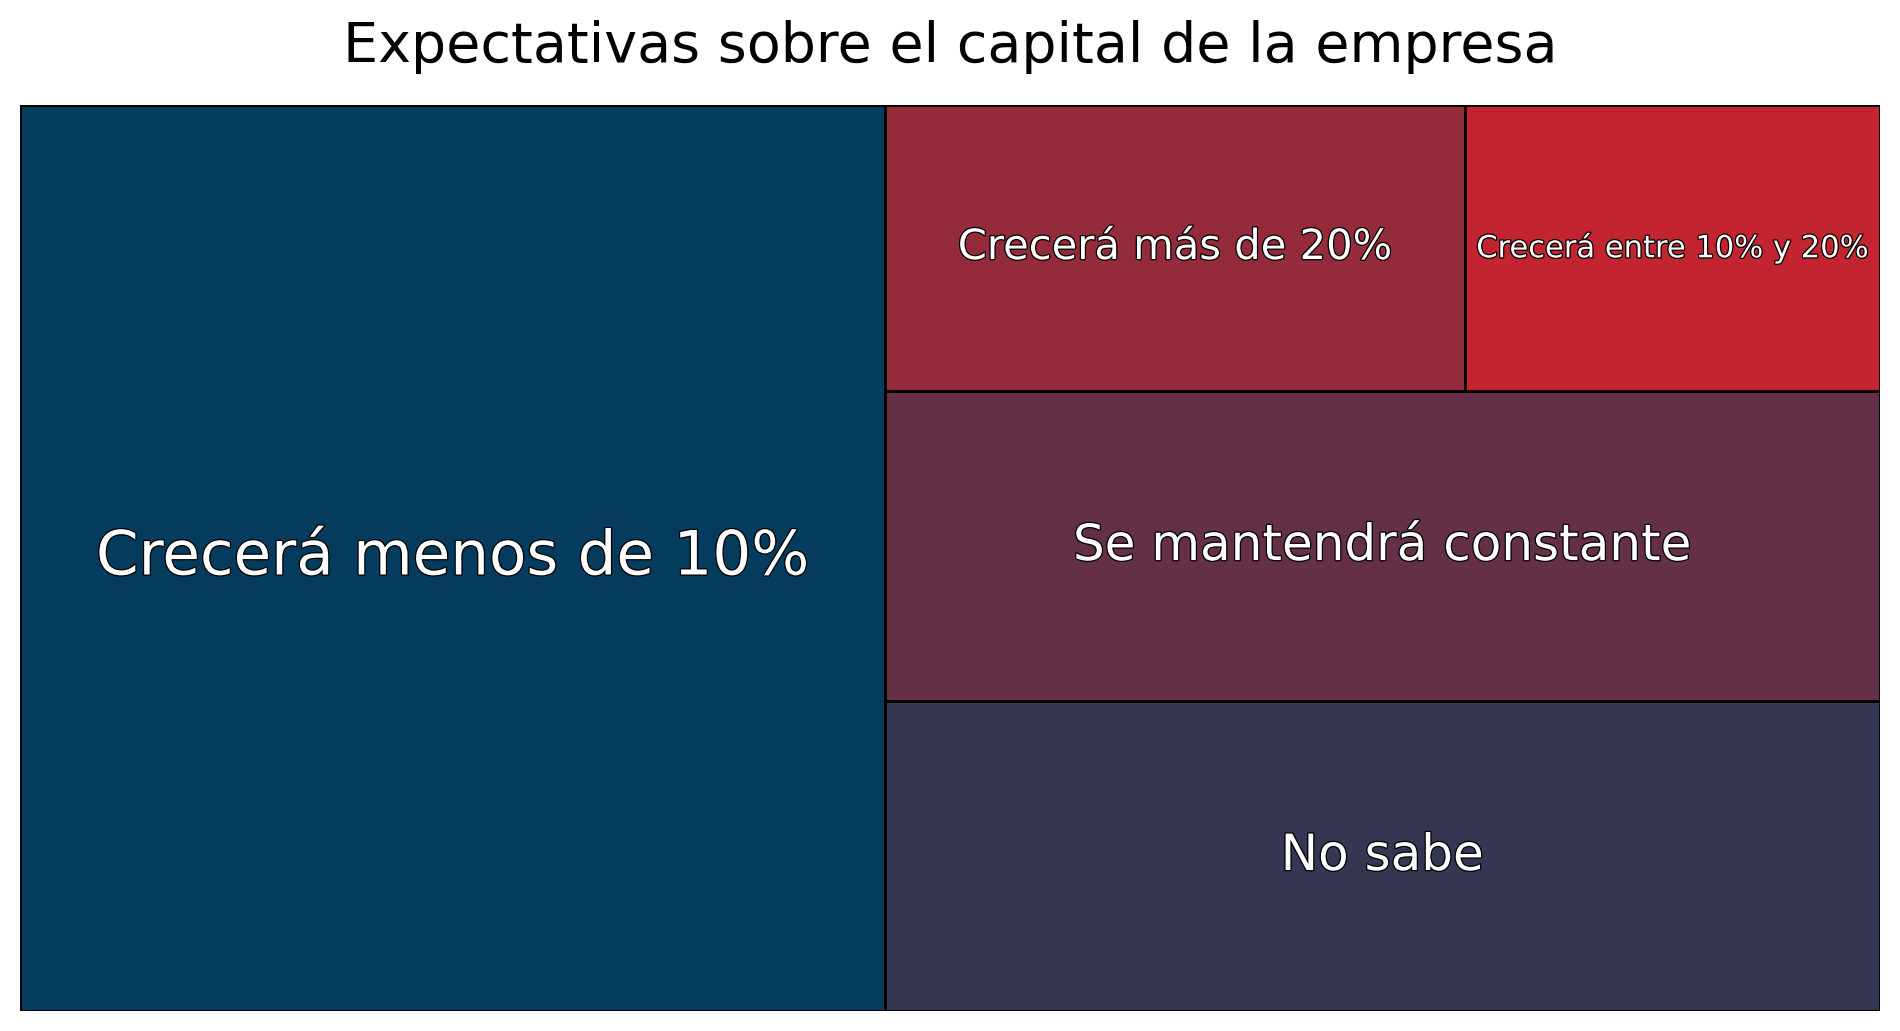

In [155]:
plottreebar(sizes=percentages_4, 
            label=percentages_4.index, 
            color=palette[::2],
            sizes_list=[22, 18, 18, 15, 11], 
            title="Expectativas sobre el capital de la empresa")

Respecto al próximo año fiscal:
* El 47% de las empresas encuestadas tienen una expectativa de crecimiento de capital menor al 10%
* Un 18% piensa que su capital se mantendrá constante y otro 18% no sabe cómo se comportará
* El 10% considera que crecerá más de 20%
* El 7% cree que el crecimiento oscilará entre 10 y 20%

### 5. Expectativas del futuro de la empresa en el corto plazo

In [156]:
# Se calculan los porcentajes por categoría
percentages_5 = df_7.Expectativa_corto_plazo_5.value_counts() / len(df_7)

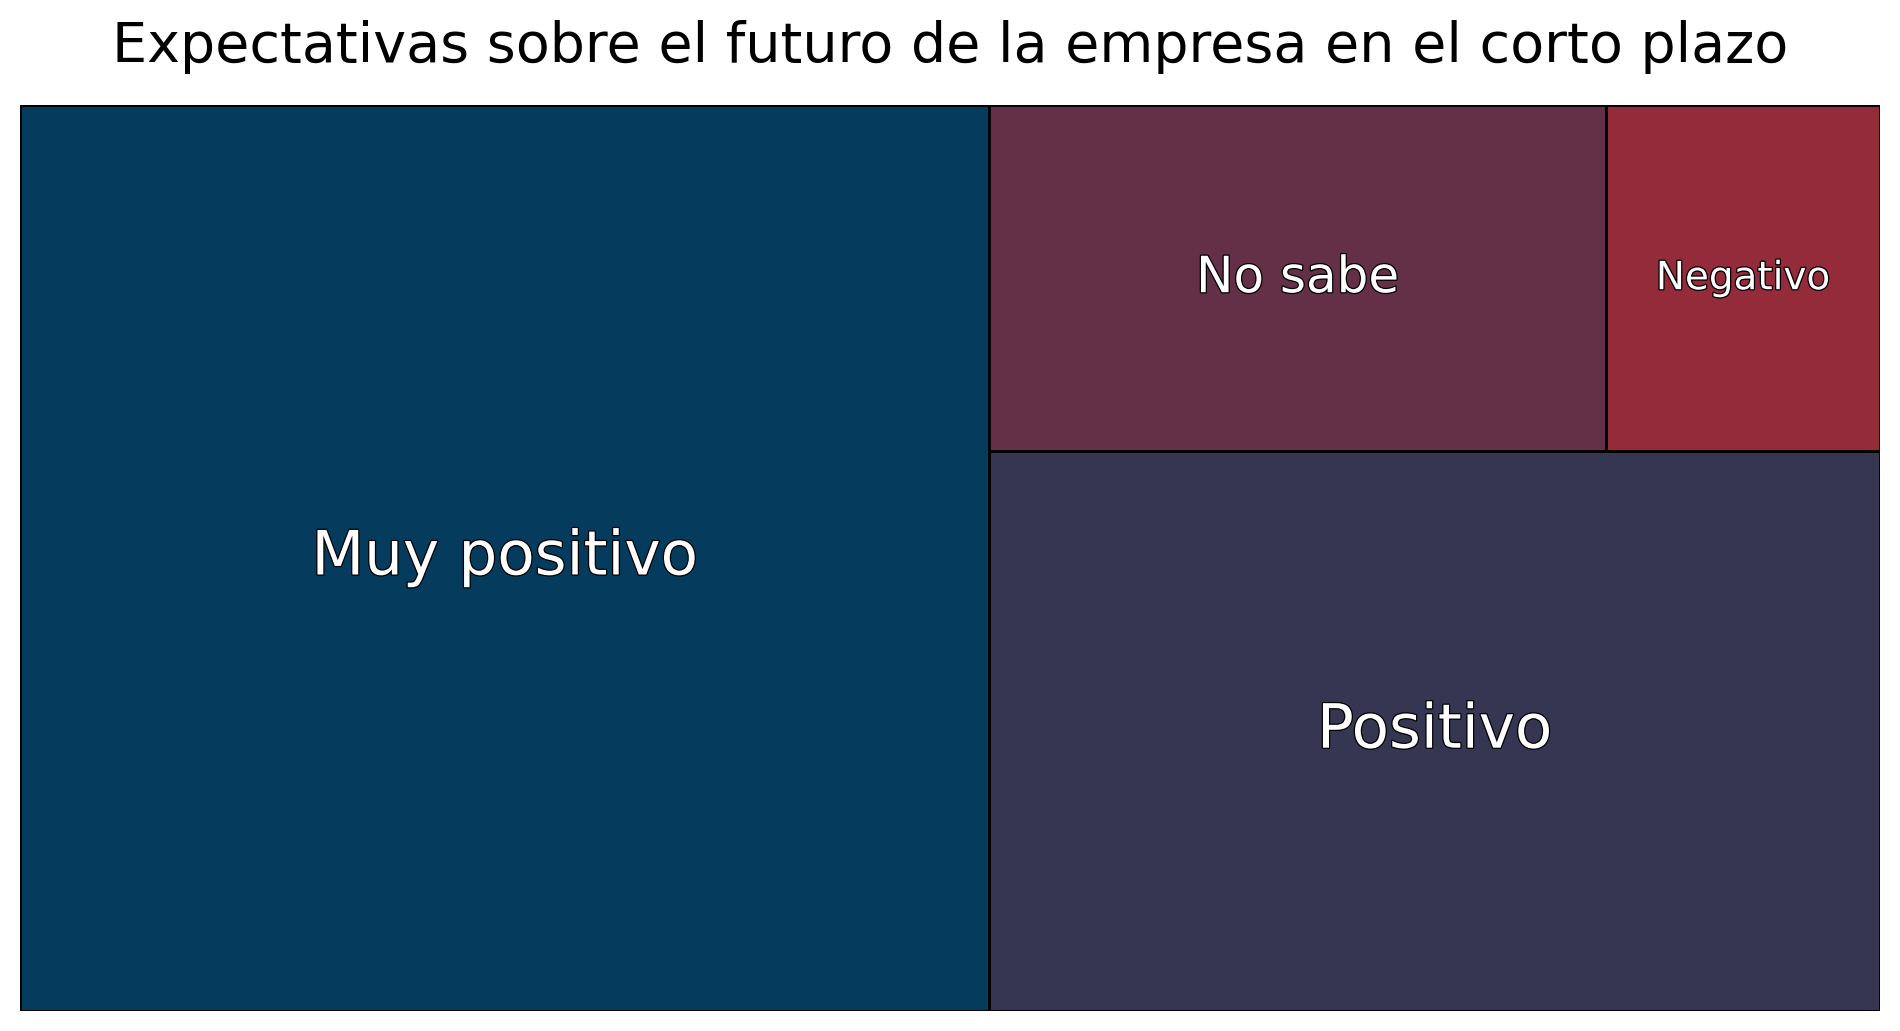

In [157]:
plottreebar(sizes=percentages_5,
            label=percentages_5.index,
            color=palette[::2],
            sizes_list=[22, 22, 18, 14],
            title="Expectativas sobre el futuro de la empresa en el corto plazo")

Respecto a las expectativas en el corto plazo:
* El 52% de las empresas encuestadas tienen expectativas muy positivas
* El 30% tiene expectativas positivas
* El 13% tiene incertidumbre sobre el futuro próximo
* El 5% considera que será negativo

En total, un 64% de las empresas encuestadas espera que su capital crezca en el siguiente año fiscal, y el 82% tiene expectativas positivas en el corto plazo. Esto indica que hay un ambiente sano en la economía por lo que podrían incrementar los empleos en diferentes áreas.

### 6.	¿Qué retos y problemas espera enfrentar?

In [158]:
# Se calculan los porcentajes por categoría
percentages_6 = df_7.Retos_futuros_6.value_counts() / len(df_7)

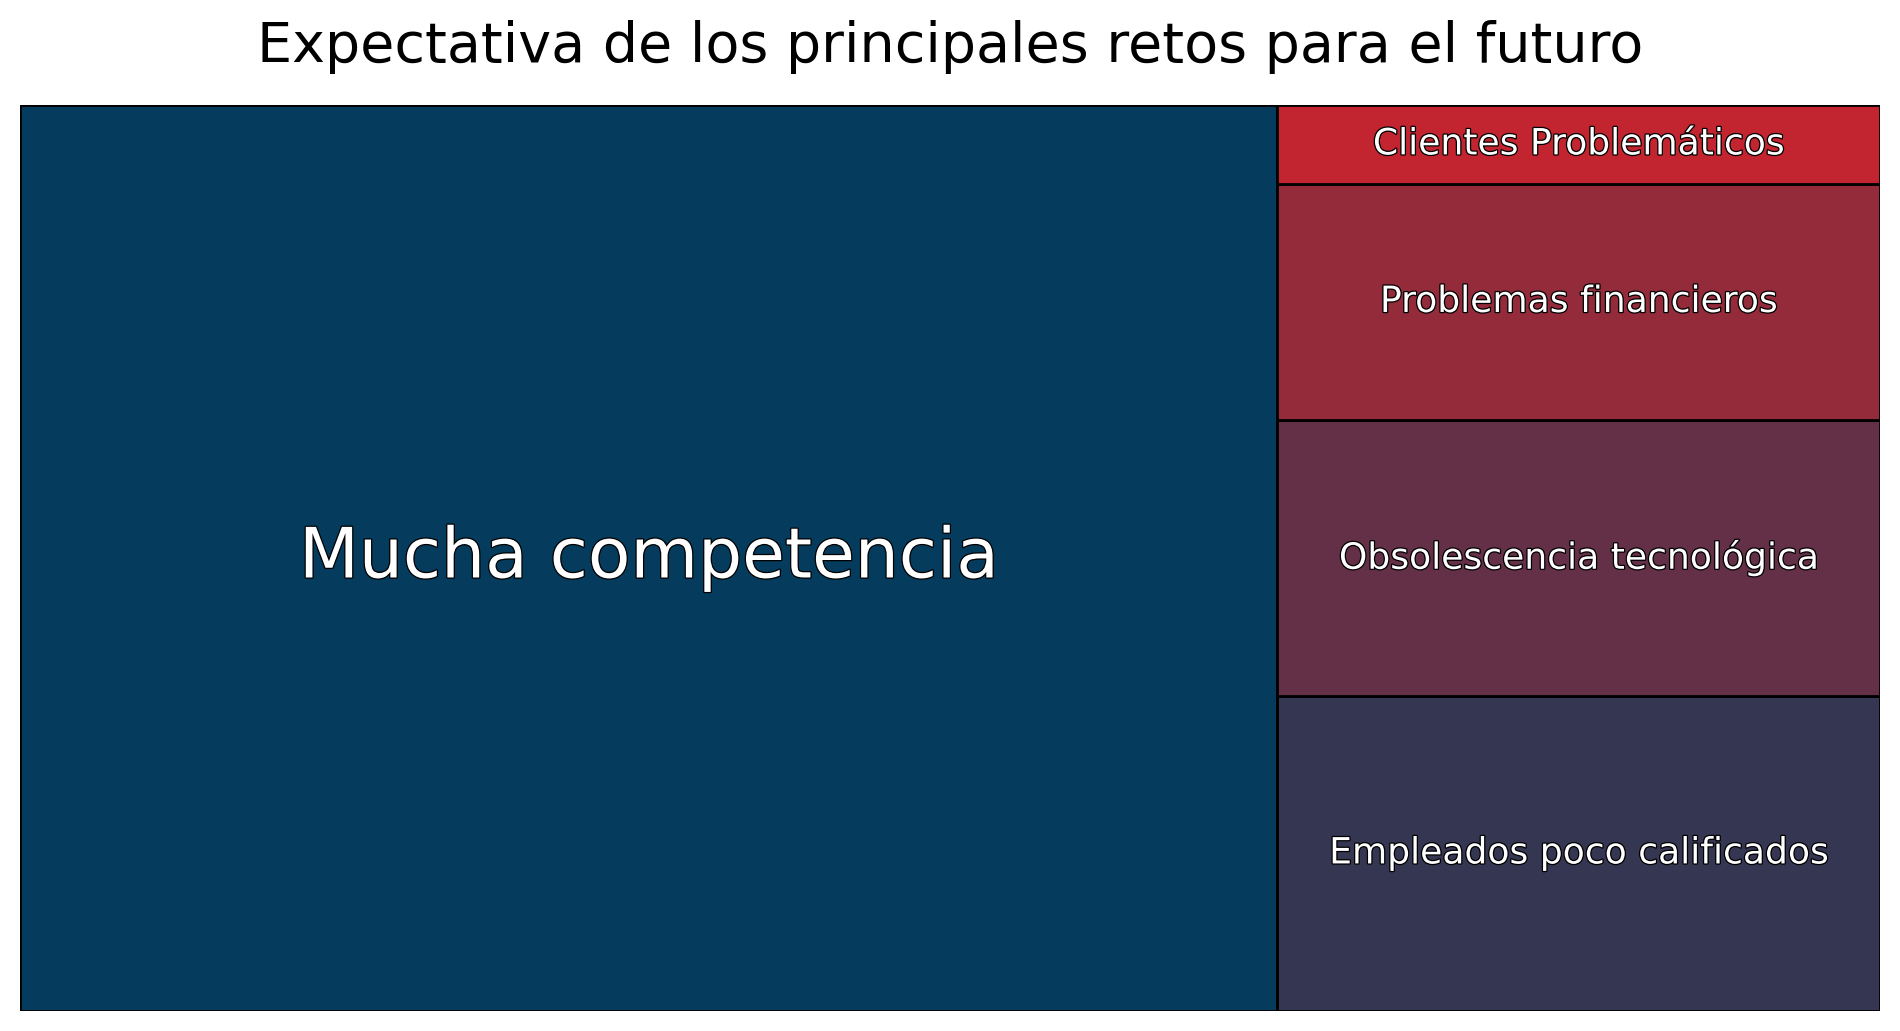

In [159]:
plottreebar(sizes=percentages_6,
            label=percentages_6.index,
            color=palette[::2],
            sizes_list=[25, 13, 13, 13, 13],
            title="Expectativa de los principales retos para el futuro")

Por mucho, el reto principal al que esperan enfrentarse las empresas encuestadas es una incremento en la competencia, en segundo lugar de importancia está la falta de habilidades y competencias por parte de sus empleados, seguido del atraso tecnológico, problemas financieros y problemas con los clientes en último lugar.

El incremento de la competencia en el mercado es otro síntoma de una economía sana, ya que significa que hay un mayor número de empresas nuevas, lo que se traduce en nuevos puesto de trabajo.

### Conclusiones de la primera sección
Las expectativas económicas y financieras de las empresas son positivas, ya que la gran mayoría espera tener crecimiento y preveen un panorama de positivo a muy positivo, lo que significa que esperan poder incrementar sus operaciones en el corto plazo.

# Segunda sección:
## Primera pregunta de investigación
### ¿Cómo valoran las empresas el papel que un contador público desempeña en su organización?



### 1. ¿Cuentan con los servicios de un contador en su empresa?

In [160]:
# Se calculan los porcentajes por categoría
percentages_1 = (df_7.Tiene_contador_1.value_counts() / len(df_7))

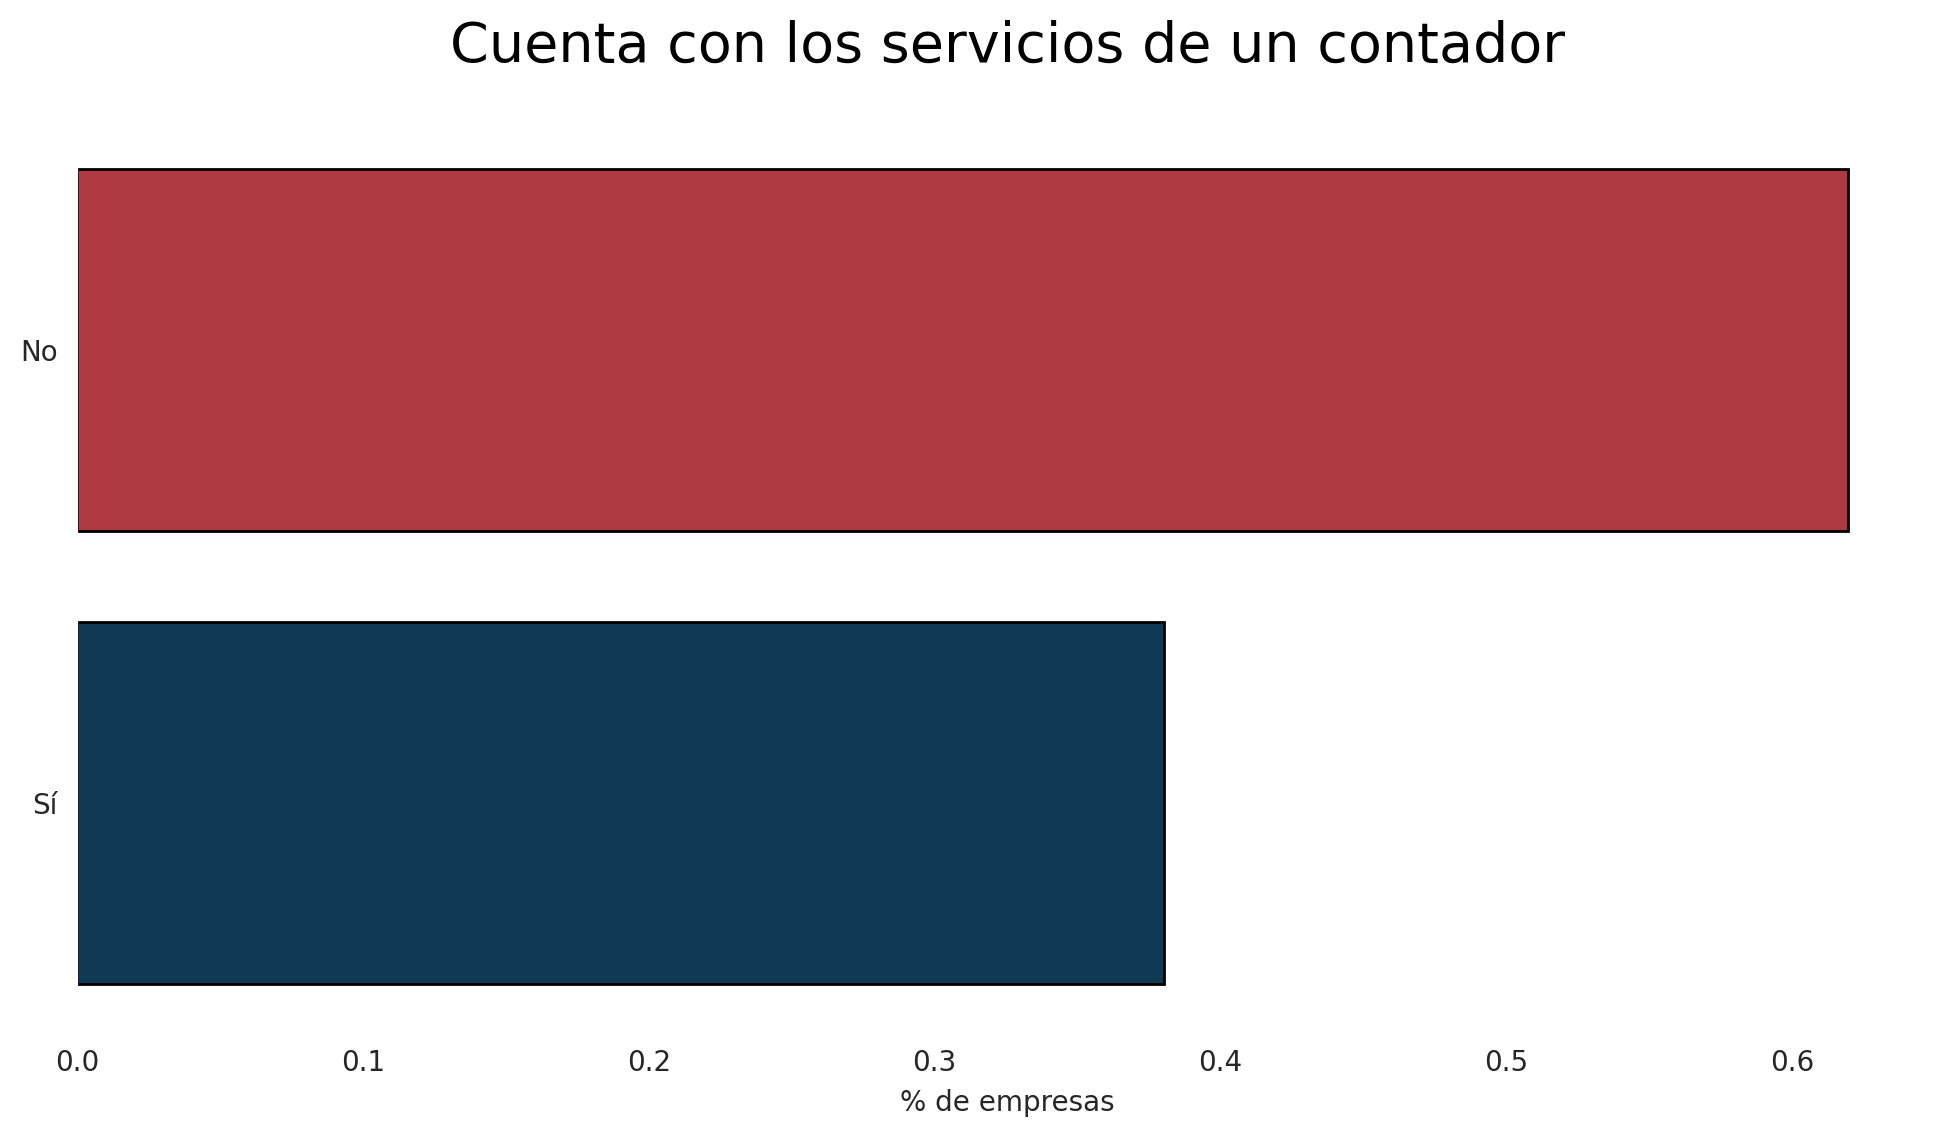

In [161]:
# Se grafican los porcentajes por categoría de la
# variable Tiene_contador_1
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
sns.barplot(x=percentages_1, 
            y=percentages_1.index,
            ax=ax, palette=(palette[8], palette[0]),
            edgecolor="k")

ax.spines['bottom'].set_edgecolor('white')
ax.spines['left'].set_edgecolor('white')
ax.spines['right'].set_edgecolor('white')
ax.spines['top'].set_edgecolor('white')

ax.set_xlabel("% de empresas")
plt.title("Cuenta con los servicios de un contador",
             size=20, fontdict={"color":"black"}, y=1.05)
plt.show()

El 62% de las empresas encuestadas no cuentan con los servicios de un contador. Esto podría indicar que existe una demanda que no ha sido cubierta en el mercado laboral.

No obstante, es necesario analizar cuál es la razón por la cual esto sucede, para poder determinar si existe una demanda insatisfecha o simplemente las empresas no consideran valiosa la contratación de un contador.

### 2. ¿Qué tan importante considera contratar los servicios de un contador público?

In [162]:
# Se calculan los porcentajes por categoría
percentages_2 = df_7.Importancia_de_contador_2.value_counts() / len(df_7)

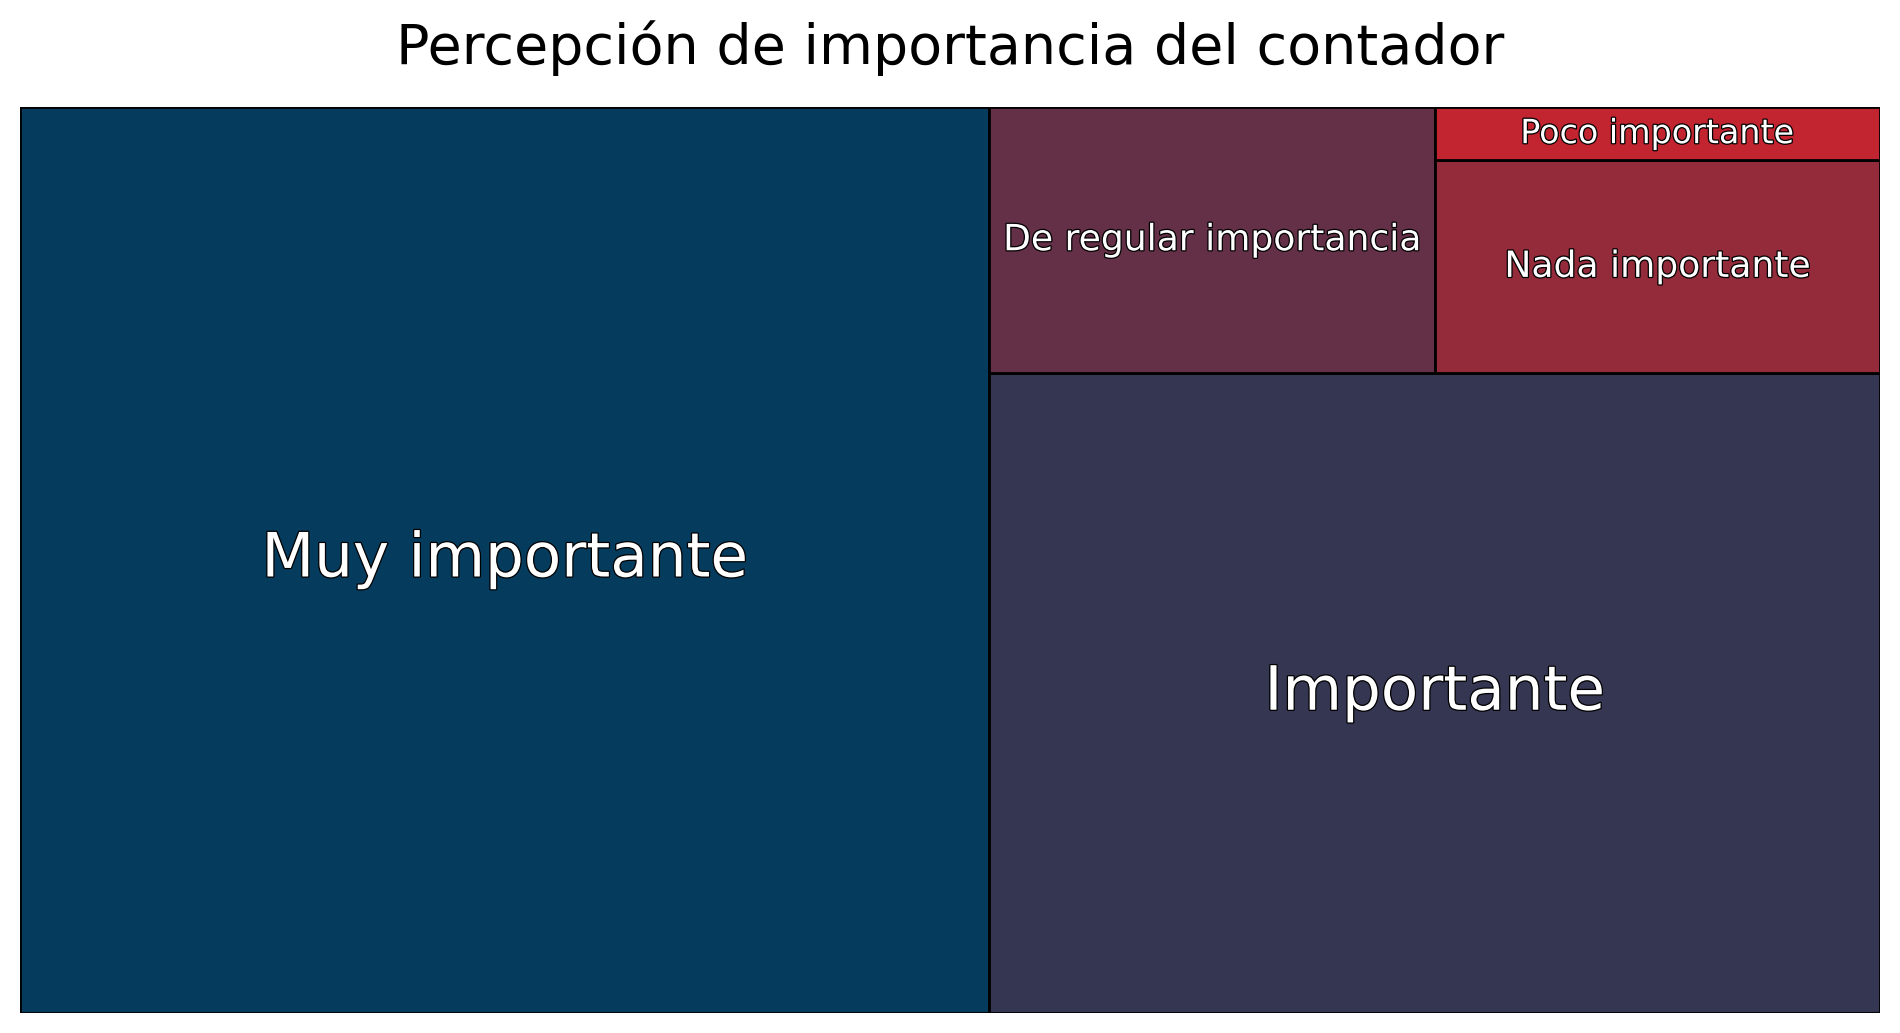

In [163]:
plottreebar(sizes=percentages_2, 
            label=percentages_2.index, 
            color=palette[::2],
            sizes_list=[22, 22, 13, 13, 12], 
            title="Percepción de importancia del contador")

Con respecto a la importancia de un contador:
* El 52% consideran que el trabajo que desempeña un contador es muy importante para su negocio, y el 34% consideran que es importante, esto significa que el 86% están de acuerdo con que un contador representa un gran beneficio para la empresa.
* El 7% considera que es de importancia regular
* El 1% consideran que son poco importantes
* El 6% consideran que no son importantes en lo absoluto



In [164]:
# Se agrupan los valores con base en si la empresa tiene o no 
# contador y el grado de importancia que le adjudican
value_the_accountant = df_7.groupby(["Tiene_contador_1", 
                                       "Importancia_de_contador_2"]
                                       ).size().to_frame().reset_index()

# Se hace una subdivición entre los que tienen y los que no tienen contador
accountant_Si = value_the_accountant.query("Tiene_contador_1=='Sí'").copy()
accountant_No = value_the_accountant.query("Tiene_contador_1=='No'").copy()

# Se cambia el nombre de la columna
accountant_No = accountant_No.rename(columns={0: "Porcentaje"})
accountant_Si = accountant_Si.rename(columns={0: "Porcentaje"})

# Se calculan los porcentajes
accountant_No["Porcentaje"] = accountant_No["Porcentaje"] / accountant_No.Porcentaje.sum()
accountant_Si["Porcentaje"] = accountant_Si["Porcentaje"] / accountant_Si.Porcentaje.sum()

# Se ordenan de mayor a menor
accountant_Si = accountant_Si.sort_values(by="Porcentaje", ascending=False)
accountant_No = accountant_No.sort_values(by="Porcentaje", ascending=False)

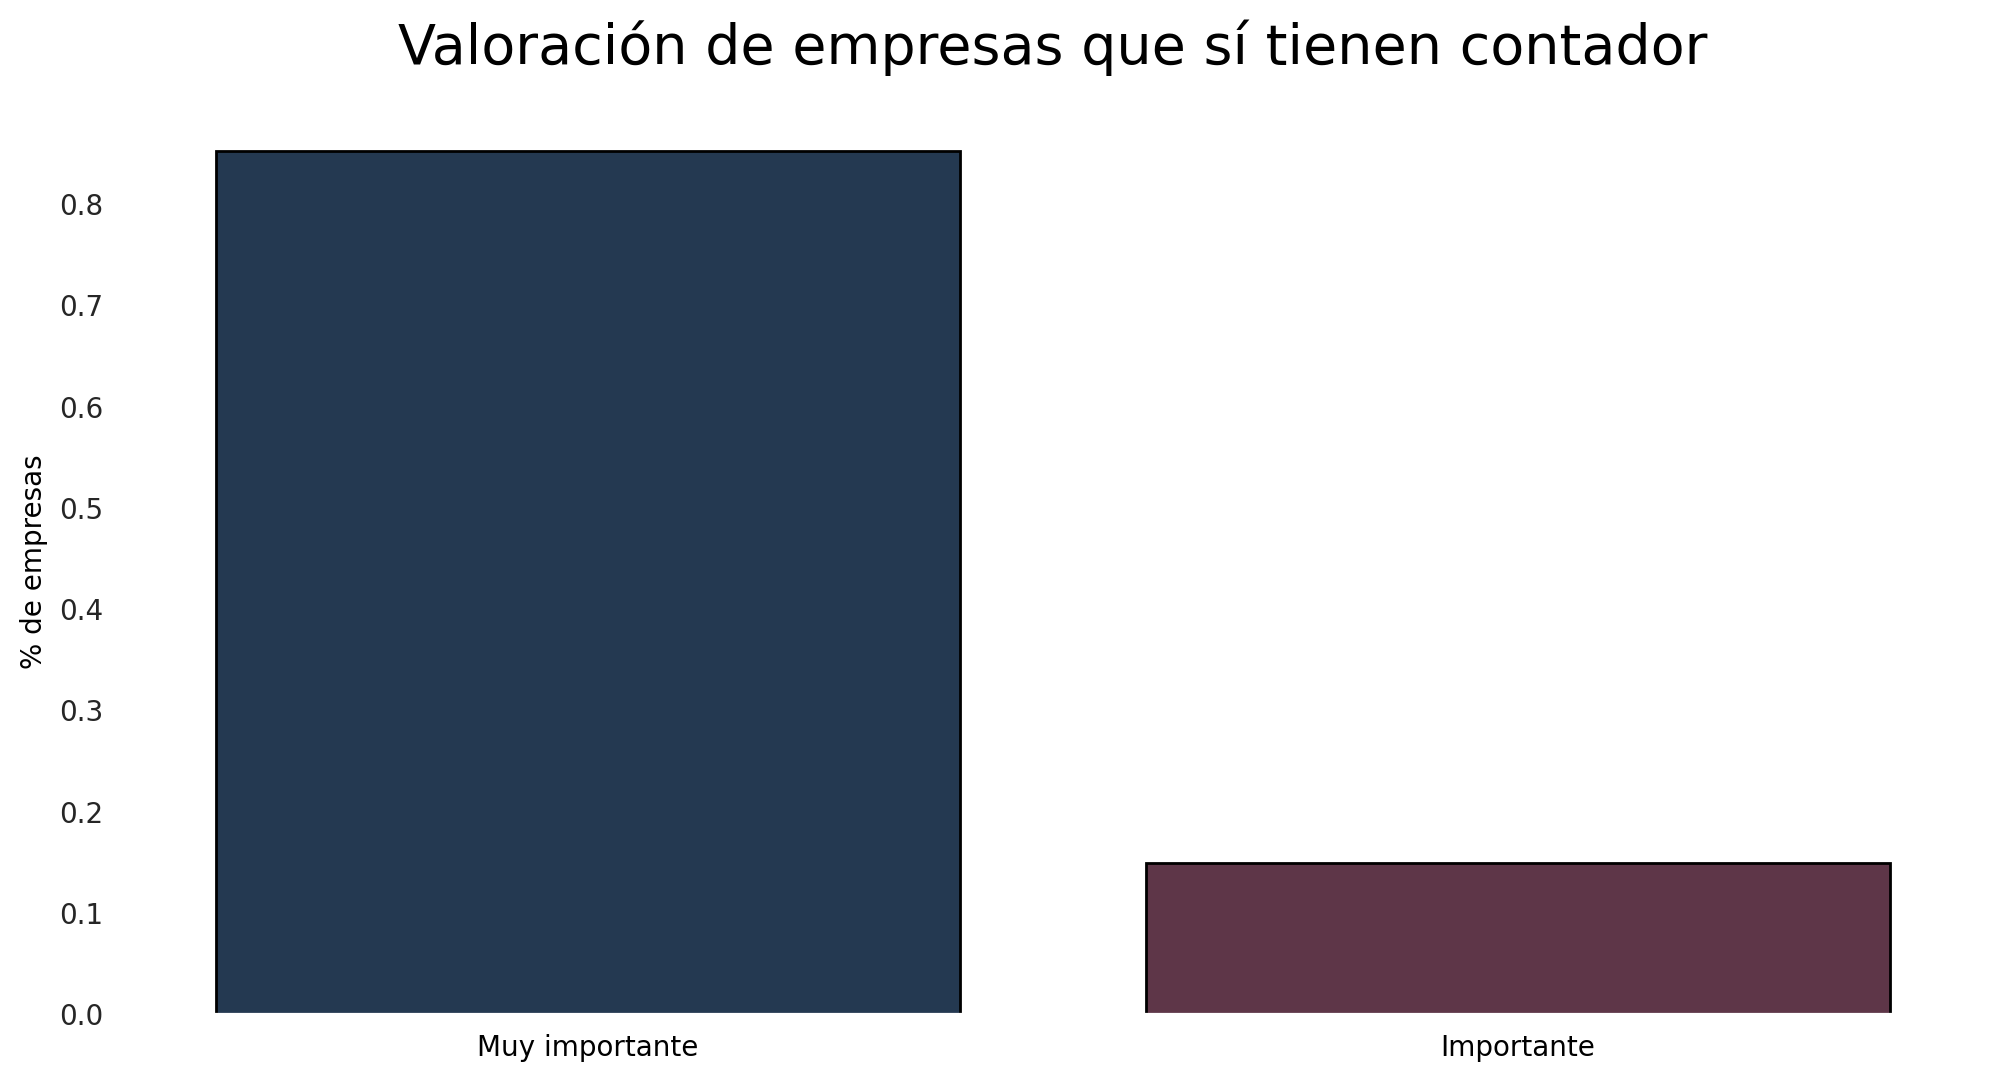

In [165]:
plotbar(x=accountant_Si.Importancia_de_contador_2,
        y=accountant_Si.Porcentaje,
        palette=(palette[1], palette[4]),
        ylabel="% de empresas",
        xlabel="",
        title="Valoración de empresas que sí tienen contador")

Como se puede observar, las empresas que sí cuentan con los servicios de un contador, consideran que su función valiosa:
* El 85% opinan que es muy importante 
* El 15% considera que es importante
* Ninguna de las empresas que cuentan con los servicios de un contador opinan que es poco importante

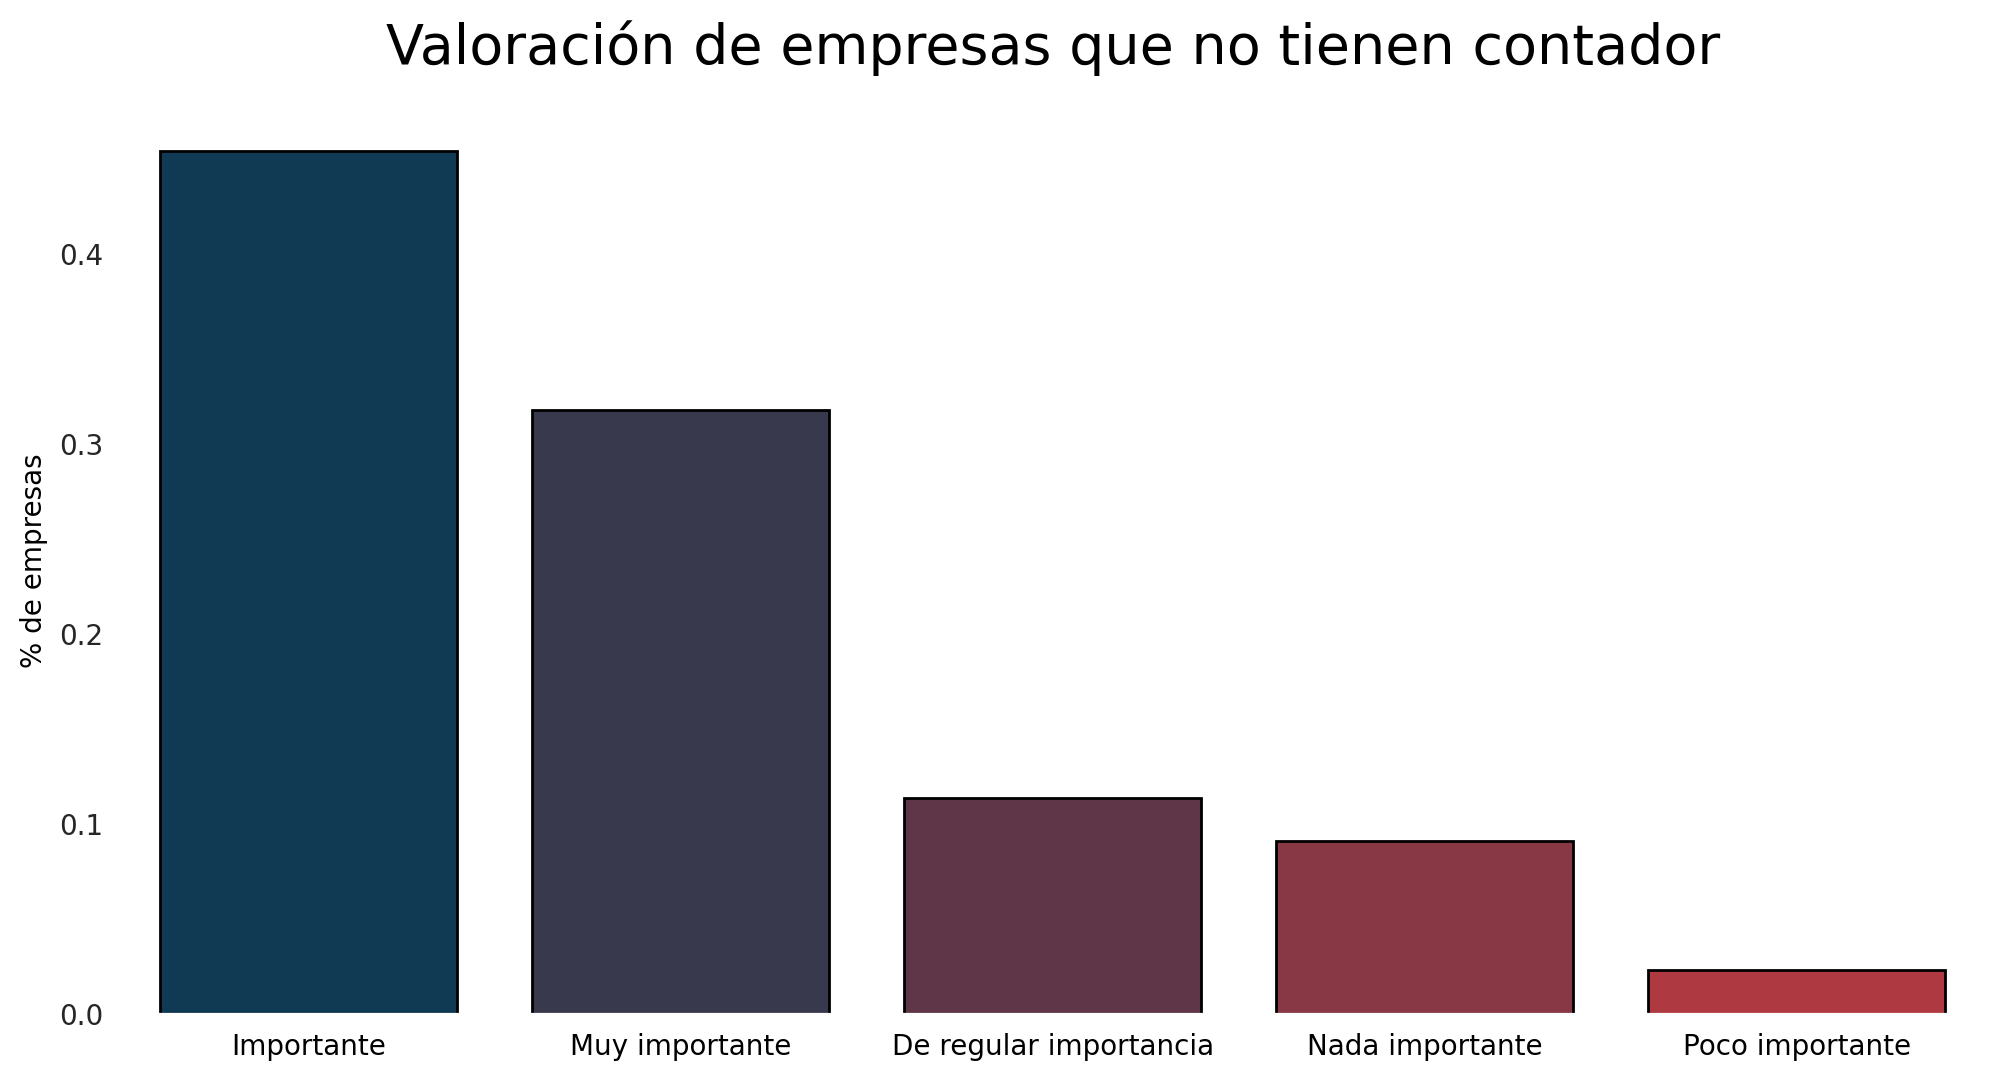

In [166]:
plotbar(x=accountant_No.Importancia_de_contador_2,
        y=accountant_No.Porcentaje,
        palette=palette[::2],
        ylabel="% de empresas",
        xlabel="",
        title="Valoración de empresas que no tienen contador")

De las empresas que no cuentan con los servicios de un contador, el 77% consideran que es importante o muy importante tener uno y tan solo el 11% considera que contar con uno es poco o nada importante. 

### Conclusiones de la segunda sección
Los contadores son valorados en el mercado laboral y sus conocimientos son considerados de gran utilidad.

# Tercera sección
## Segunda pregunta de investigación
### ¿Existe demanda en el mercado laboral para los egresados Licenciatura en Contaduría de la Universidad Tecnológica de la Sierra Sur de Oaxaca (UTSSO)?

### 3. Tipo de contratación de los contadores

In [167]:
percentages_3 = df_7.Situacion_laboral_3.value_counts() / len(df_7)

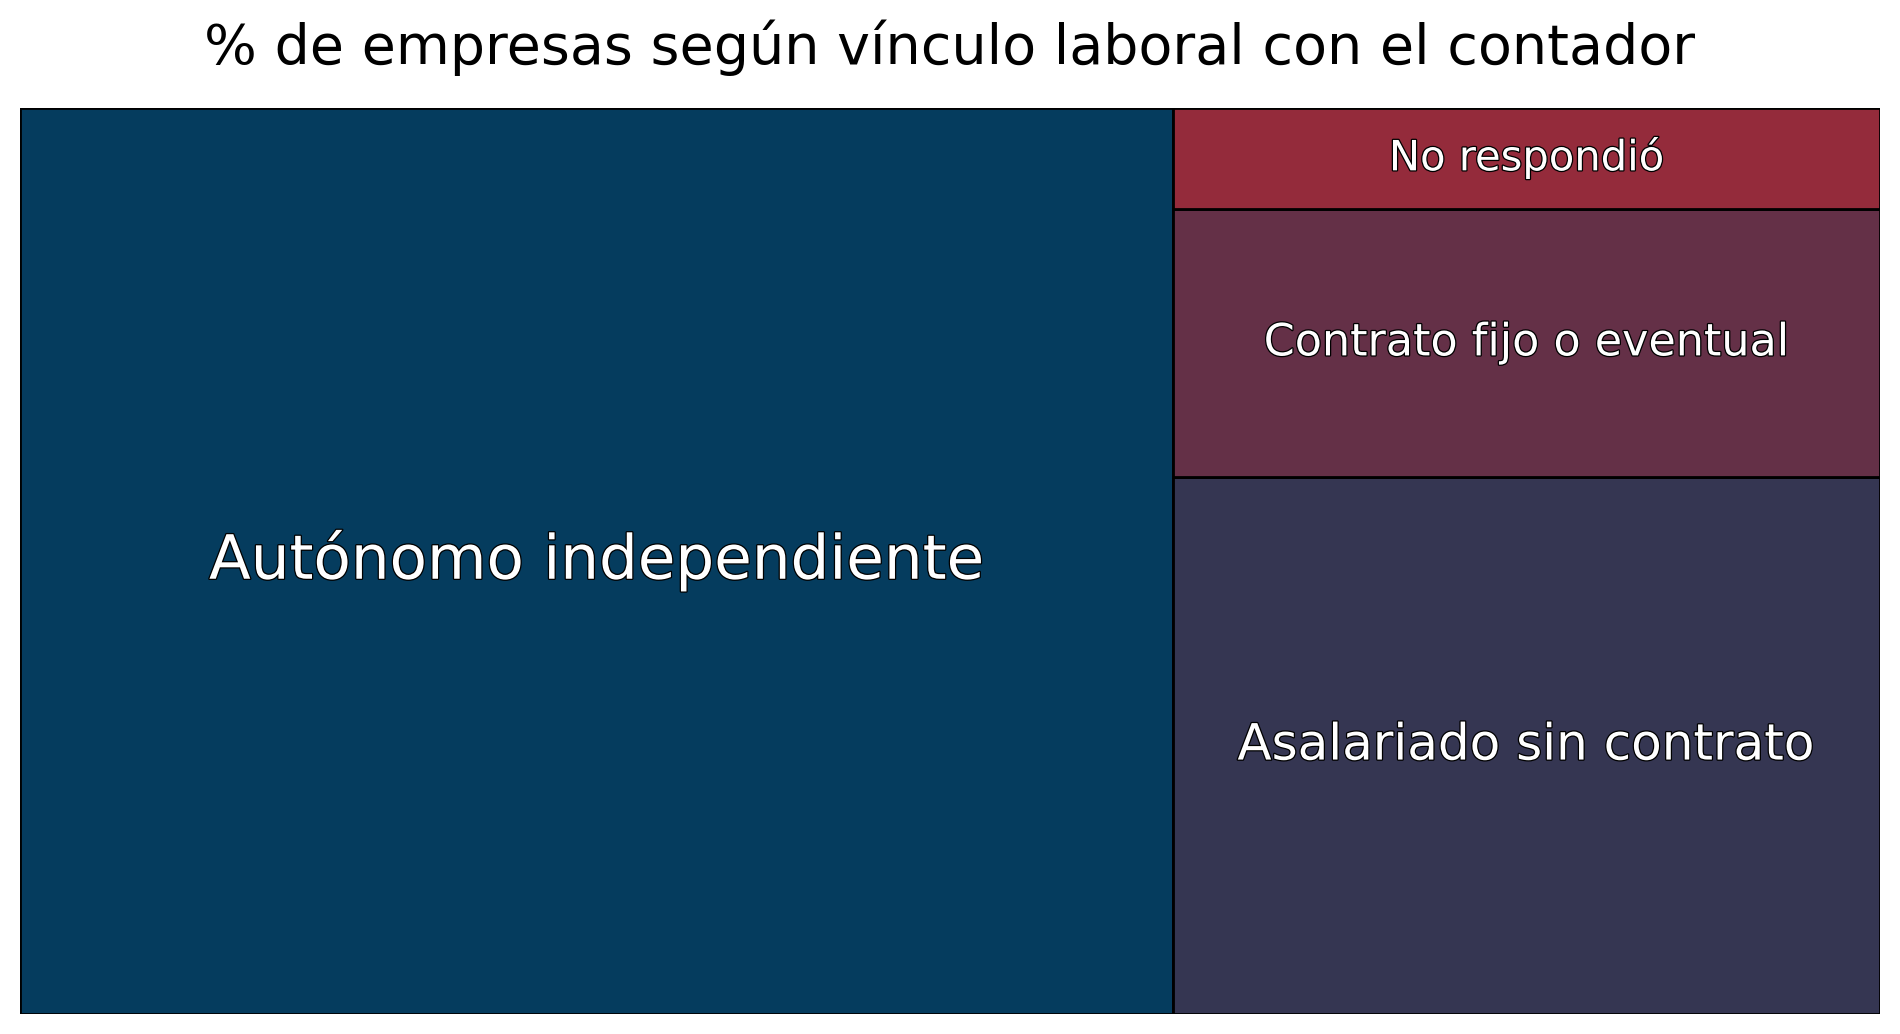

In [168]:
# Se grafican los porcentajes por categoría de la
# variable Importancia_de_contador_2
plottreebar(sizes=percentages_3, 
            label=percentages_3.index, 
            color=palette[::2],
            sizes_list=[22, 18, 16, 15], 
            title="% de empresas según vínculo laboral con el contador")

* El 62% de las empresas obtienen sus servicios contables mediante un contador autónomo independiente
* El 23% tienen un contador asalariado sin contrato
* El 11% tiene un contador bajo contrato fijo o eventual
* El 4% no respondió la pregunta

El tipo de relación laboral con las empresas es principalmente de manera autónoma independiente.

### 7. Intenciones de contratación por departamento

In [169]:
percentages_7 = df_7.Intencion_de_contratacion_7.value_counts() / len(df_7)

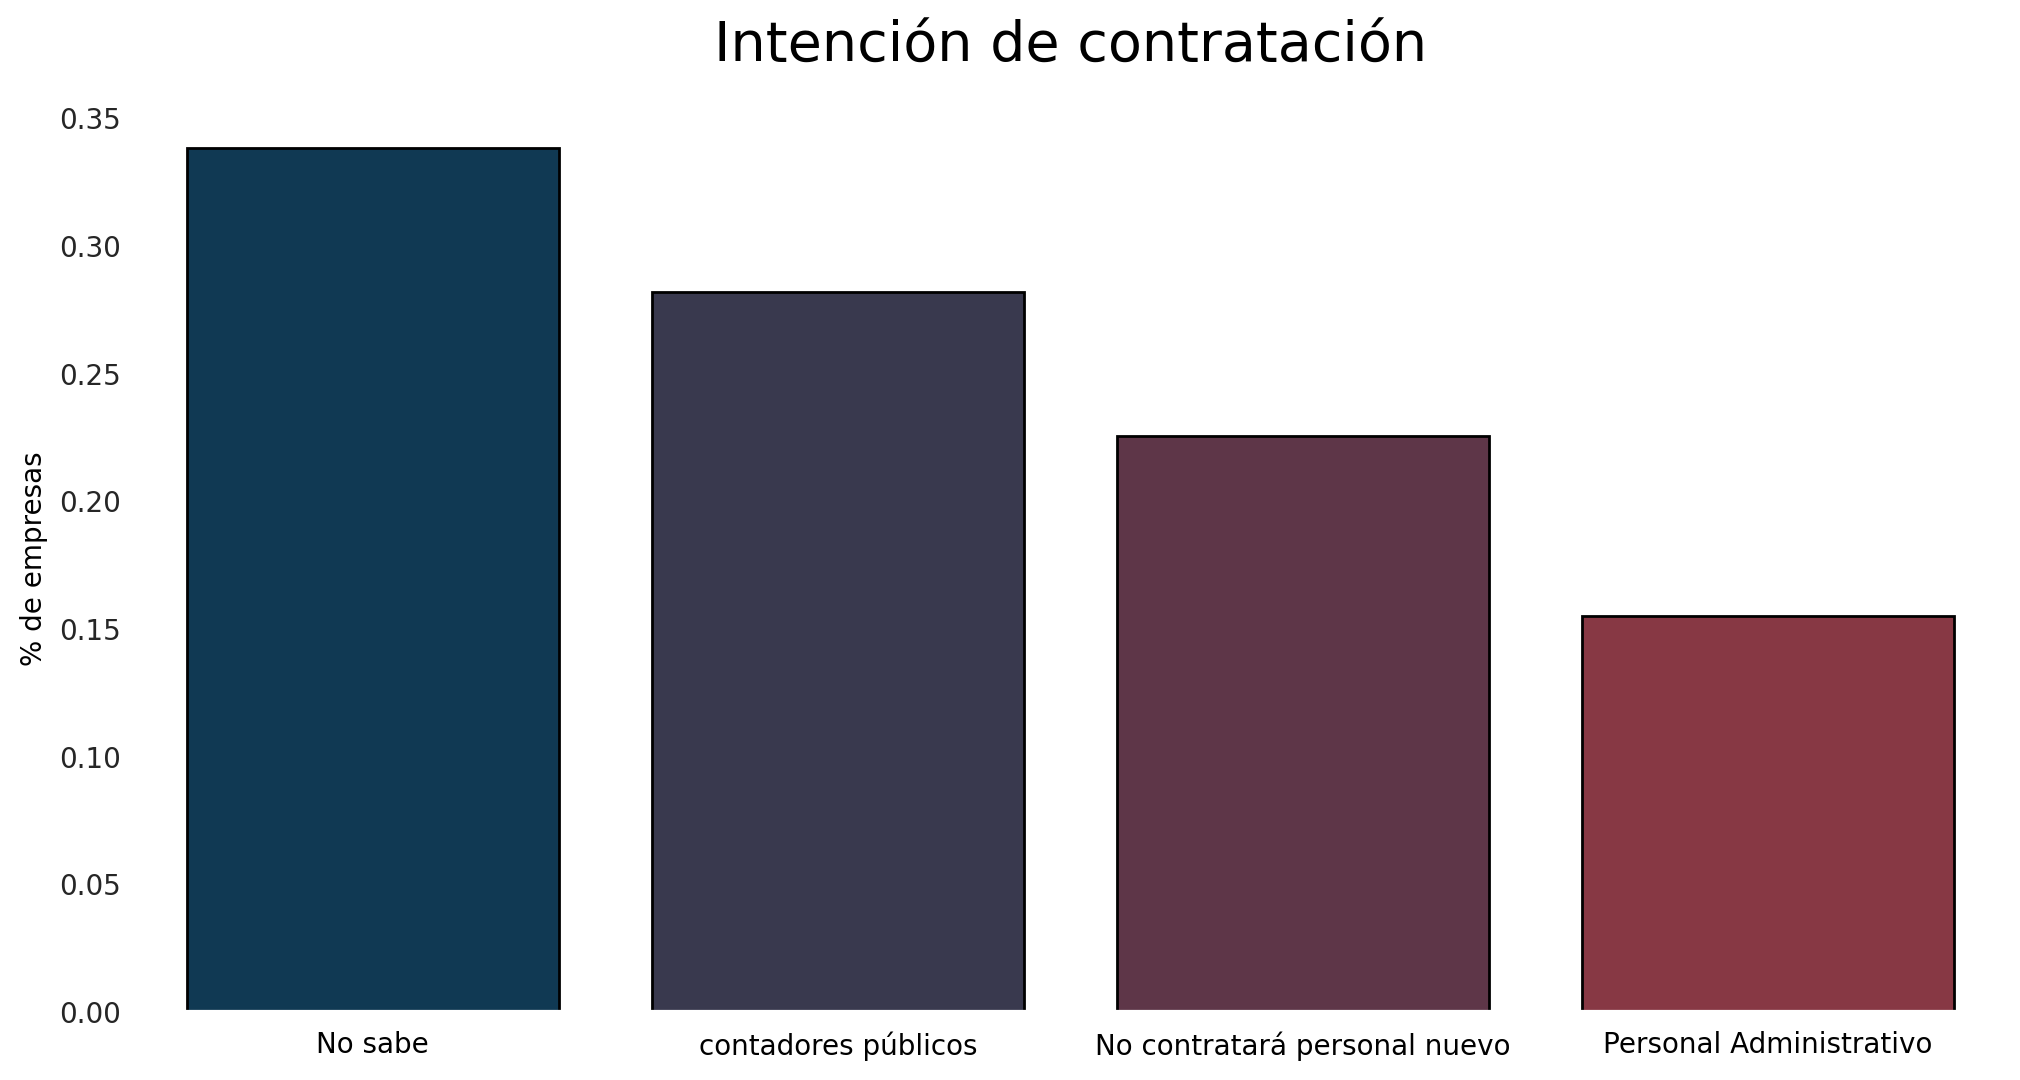

In [170]:
plotbar(x=percentages_7.index,
        y=percentages_7,
        palette=palette[::2],
        ylabel="% de empresas",
        xlabel="",
        title="Intención de contratación")

El 34% de las empresas no tienen claro si realizarán nuevas contrataciones en el corto plazo, el 28% considera que podría contartar contadores públicos, el 15% considera contratar personal administrativo y el 23% no planea contratar nuevo personal.

### 8.	Cantidad de personal por puesto que contrataría

In [171]:
# Esta función toma un dataframe, toma las columnas de interés
# y las transforma de un formato ancho a uno largo,
# se agrupa este dataframe por la suma de las categorías que contiene
# finalmente se ordena de manera descendente
def data_melt_group(data):
    data = data.drop(data.columns[0], axis=1)
    data = data.melt(var_name="Categoria",
                     value_name="Total").groupby("Categoria").sum()
    data = data.sort_values(by="Total", ascending=False)
    return data

In [172]:
jobs = data_melt_group(df_8)
jobs = jobs.drop(index="Otro")
jobs.head(2)

,Total
Categoria,
Ventas_Marketing,67
Produccion,66


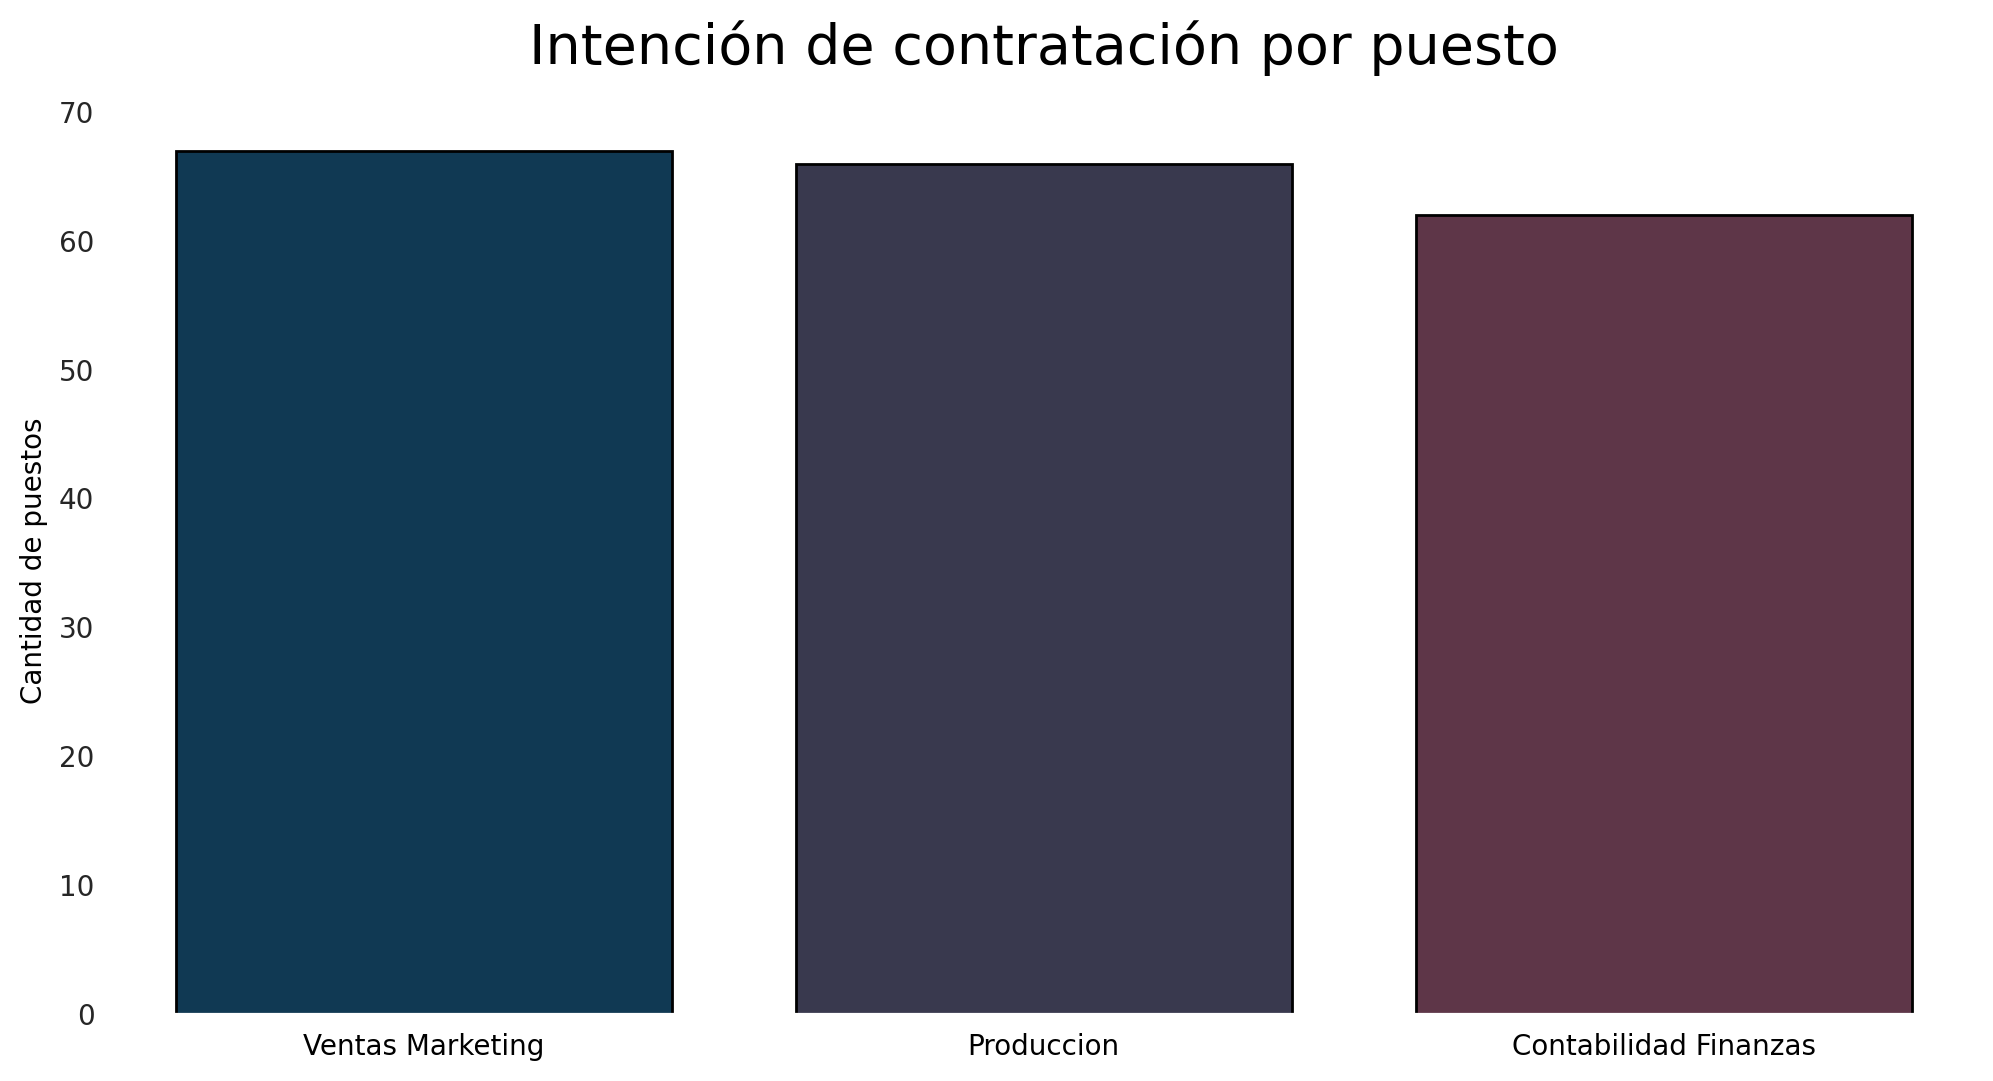

In [173]:
plotbar(x=jobs.index,
        y=jobs.Total,
        palette=palette[::2],
        ylabel="Cantidad de puestos",
        xlabel="",
        title="Intención de contratación por puesto")

Los tres puestos que mayor intención de contratación tienen son ventas y marketing, producción y contabilidad y finanzas con 67, 66 y 62 posibles vacantes nuevas. En el cuarto lugar el puesto de Administración y RH cuenta con 45 posibles vacantes. 

Las empresas cuentan con una necesidad insatisfecha de profesionistas que se encarguen de la contabilidad y las finanzas.

### 9.	Cantidad de personal por nivel educativo que contraría

In [174]:
education = data_melt_group(df_9)
education = education.drop(index="Otro")
education.head(2)

,Total
Categoria,
Superior_Nivel_Tecnico,100
Medio_Superior,81


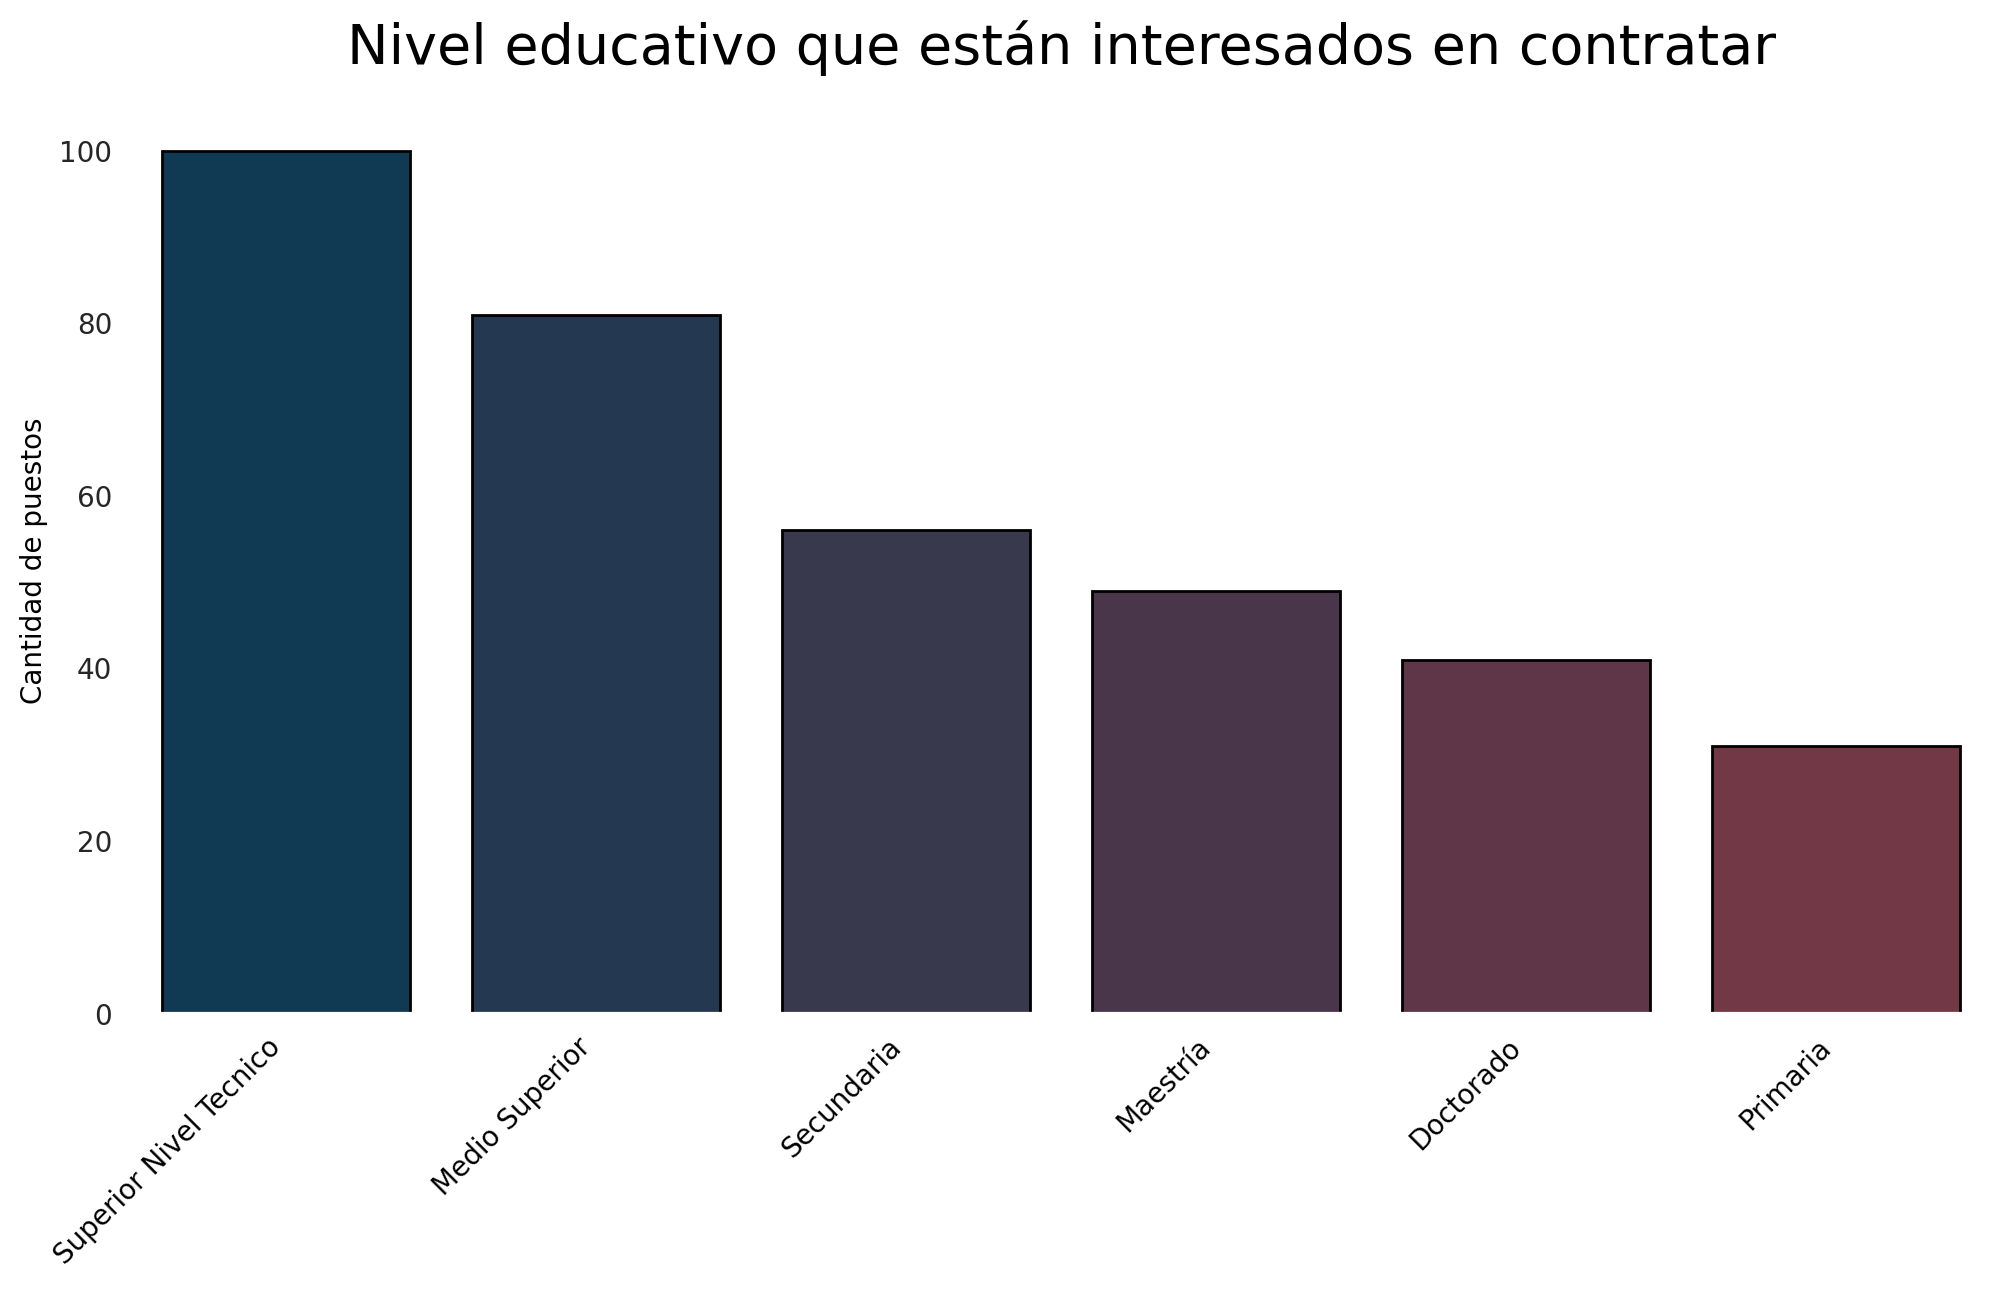

In [175]:
plotbar(x=education.index,
        y=education.Total,
        palette=palette,
        ylabel="Cantidad de puestos",
        xlabel="",
        rotation=45,
        ha="right",
        title="Nivel educativo que están interesados en contratar")

Los niveles educativos más demandados entre las empresas encuestadas son: educación superior a nivel técnico y educación media superior.

Es interesante observar que el nivel educativo secundaria es el tercero con mayor intención de contratación por encima de los grados de maestría y doctorado. Esto podría deberse a que el tipo de empresas encuestadas consideran que no es necesario un grado de especialización tan alta para los trabajos que requieren; es decir, las empresas de la zona en la que se pretende abrir la carrera TSU en contaduría están interesadas en profesionistas con este nivel educativo por encima de niveles más altos. 

### 12. Disposición a contratar egresados de la carrera TSU en contaduría

In [176]:
# Se agrupan los valores por categoría y
# se calculan los porcentajes
df_12_group = df_12.groupby("Contrataria").size()
percentages_12 = df_12_group / df_12_group.sum()
percentages_12 = percentages_12.sort_values(ascending=False)

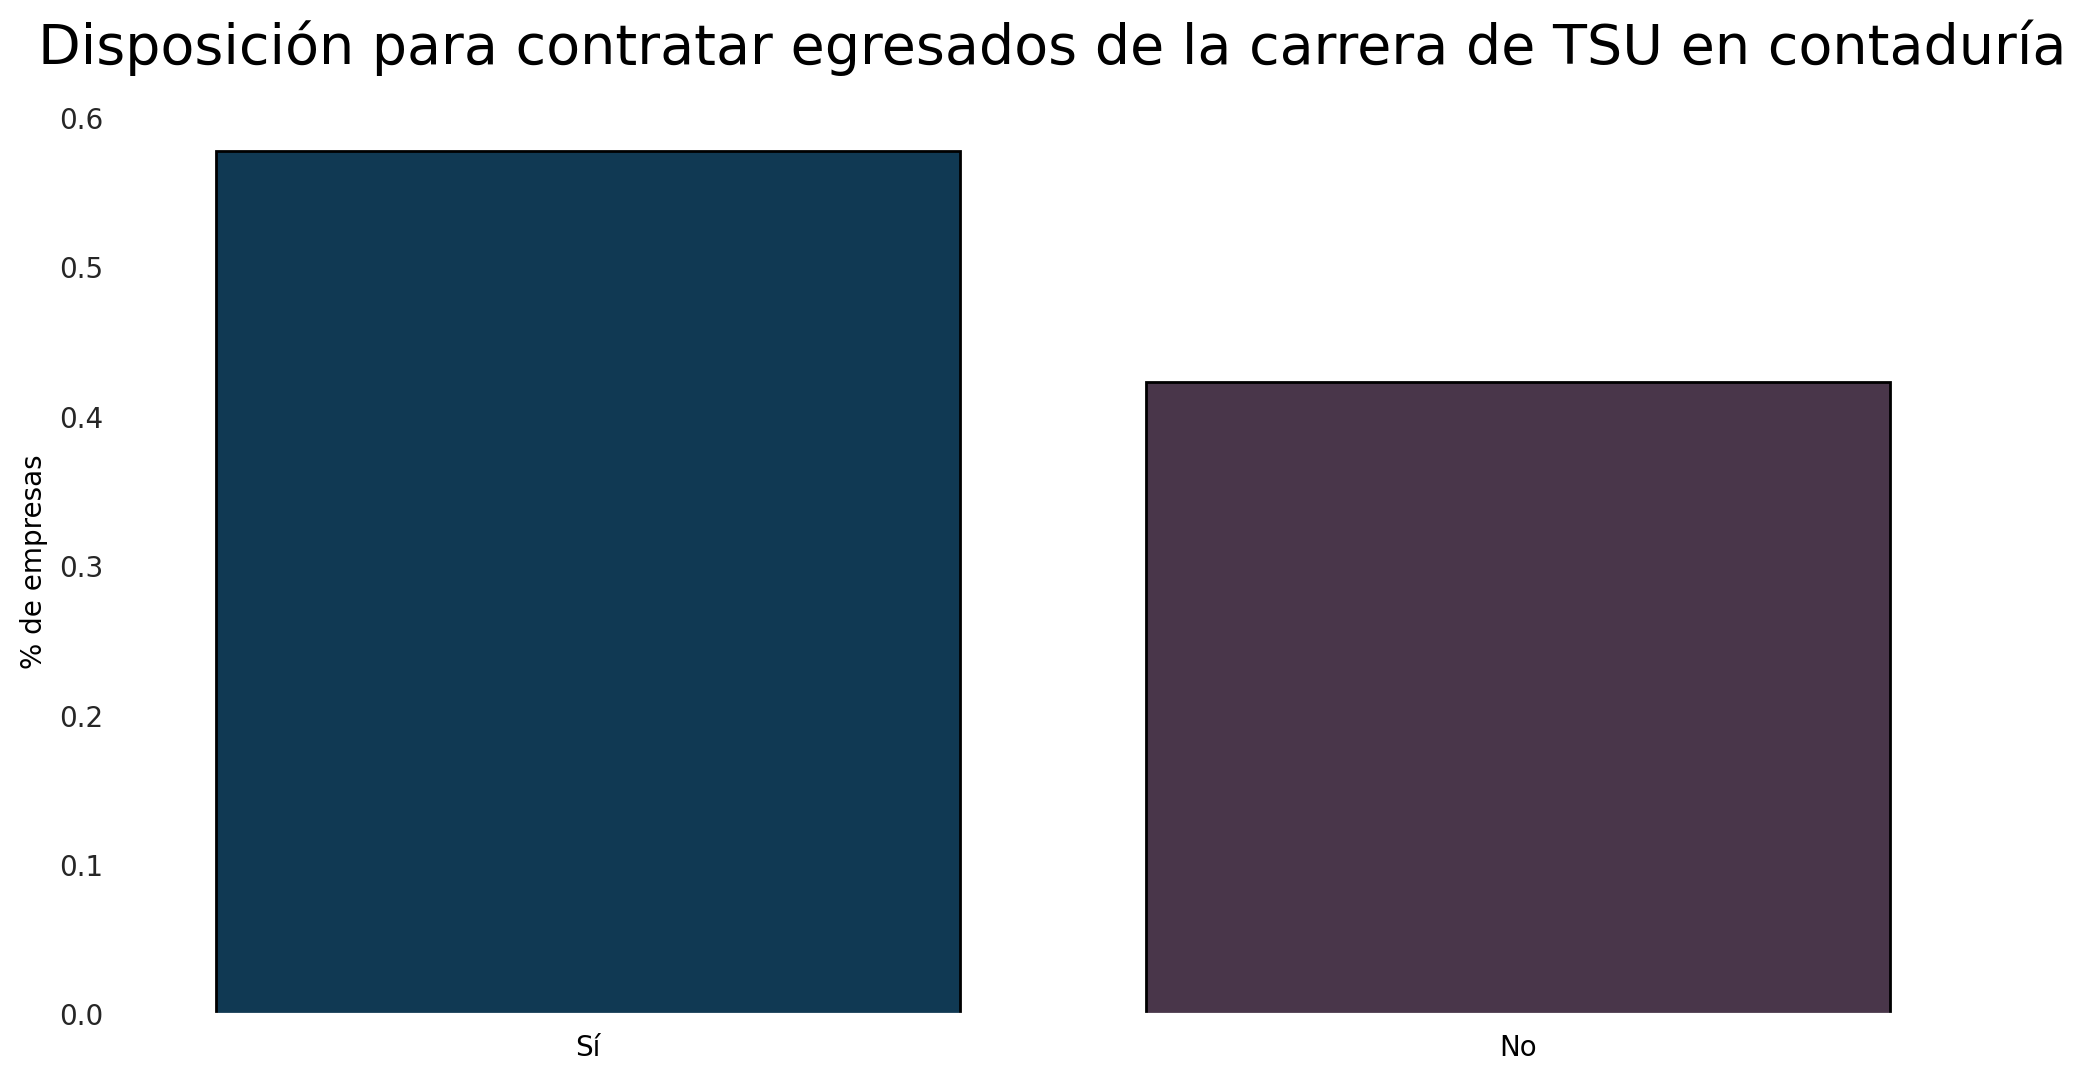

In [177]:
plotbar(x=percentages_12.index,
        y=percentages_12,
        palette=palette[::3],
        ylabel="% de empresas",
        xlabel="",
        title="Disposición para contratar egresados de la carrera de TSU en contaduría")

Con respecto a la disposición para contratar TSU en contaduría
* El 58% de las empresas están dispuestas
* El 42% no están dispuestas

### 12a. Motivos 

In [178]:
# Separar los motivos de los que respondieron que sí 
# de los que respondieron que no
motive_Si = df_12.query("Contrataria=='Sí' & Motivo!='No respondió'")
motive_No = df_12.query("Contrataria=='No' & Motivo!='No respondió'")

### Motivos de quienes sí contratarían TSU contable

In [179]:
# Se convierten los motivos de quienes respondieron "Sí" 
# en una cadena de texto y se eliminan comas, puntos y 
# dobles espacios. 
# También se elimina un error de escritura 
# de la palabra govenes por jóvenes
text_motive_Si = ",".join(motive_Si.Motivo).replace(",", " ")
text_motive_Si = text_motive_Si.replace(".", "")
text_motive_Si = text_motive_Si.replace("  ", " ")
text_motive_Si = text_motive_Si.replace("  ", " ")
text_motive_Si = text_motive_Si.replace("govenes", "jóvenes")
tokens_motive_Si = text_motive_Si.split()

# Se eliminan las palabras vacías, es decir, aquellas que no
# tienen mucha relevancia como artículos, preposiciones, etc.
nltk.download('stopwords')
empty_words = set(stopwords.words('spanish'))
tokens_motive_Si_no_empty_words = [token.lower() for token in tokens_motive_Si if token.lower() not in empty_words]

# Se convierte la lista de palabras en un string
motive_Si_main_words = ",".join(tokens_motive_Si_no_empty_words).replace(",", " ")

[nltk_data] Downloading package stopwords to /home/mario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


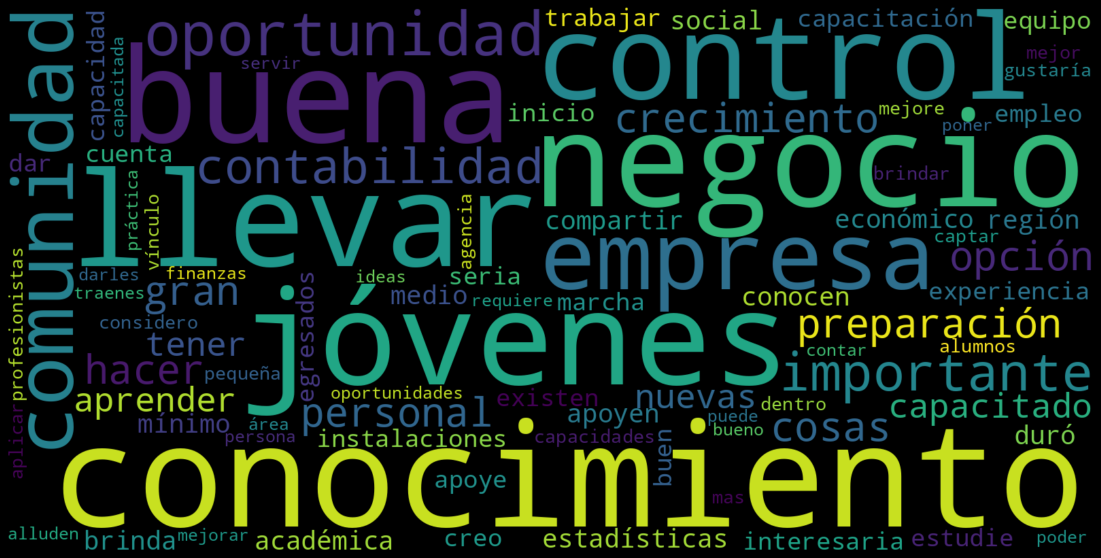

In [180]:
# Word cloud de motivos de quienes sí contratarían egresados de TSU en contabilidad
wordCloud_Si = WordCloud(width=1600, height=800).generate(motive_Si_main_words)
plt.figure(figsize=(20, 10), facecolor="k")
plt.imshow(wordCloud_Si, interpolation='bilinear')
plt.axis('off')
plt.show()

Las empresas dispuestas a contratar a TSU consideran la juventud como una cualidad y consideran que los egresados de esta carrera cuentan con una buena preparación y con buenos conocimientos de su área. También consideran que el conocimiento del contexto de la comunidad es algo positivo en este caso.

### Motivos de quienes no contratarían TSU contable

In [181]:
# Se convierten los motivos de quienes respondieron "No" 
# en una cadena de texto y se eliminan comas, puntos y 
# dobles espacios. 
text_motive_No = ",".join(motive_No.Motivo).replace(",", " ")
text_motive_No = text_motive_No.replace(".", "")
text_motive_No = text_motive_No.replace("  ", " ")
text_motive_No = text_motive_No.replace("  ", " ")
tokens_motive_No = text_motive_No.split()

# Se eliminan las palabras vacías, es decir, aquellas que no
# tienen mucha relevancia como artículos, preposiciones, etc.
nltk.download('stopwords')
empty_words = set(stopwords.words('spanish'))
tokens_motive_No_no_empty_words = [token.lower() for token in tokens_motive_No if token.lower() not in empty_words]

# Se convierte la lista de palabras en un string
motive_No_main_words = ",".join(tokens_motive_No_no_empty_words).replace(",", " ")

[nltk_data] Downloading package stopwords to /home/mario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


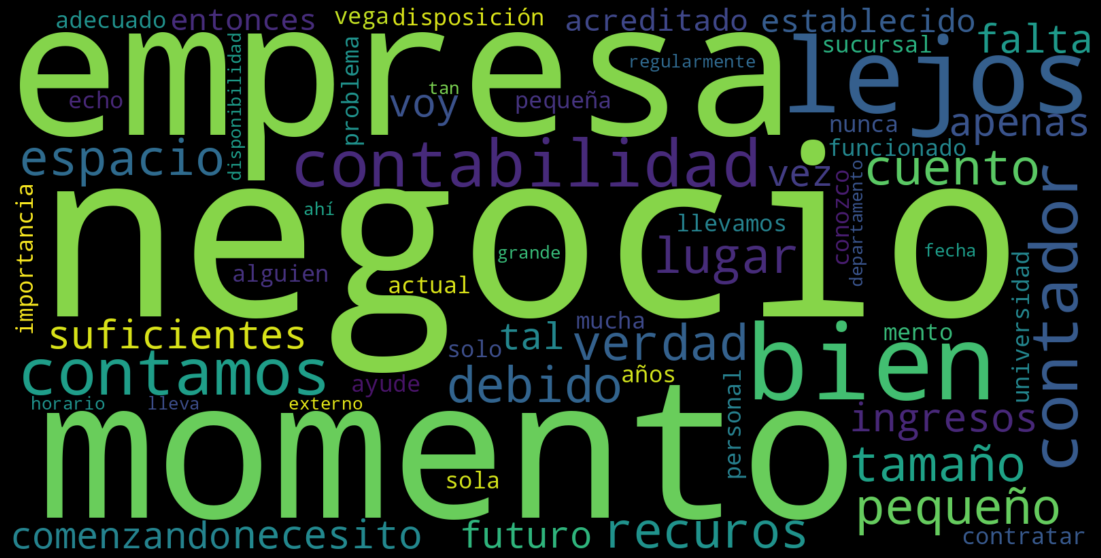

In [182]:
# Word cloud de motivos de quienes no contratarían egresados de TSU en contabilidad
wordCloud_No = WordCloud(width=1600, height=800).generate(motive_No_main_words)
plt.figure(figsize=(20, 10), facecolor="k")
plt.imshow(wordCloud_No, interpolation='bilinear')
plt.axis('off')
plt.show()

Las empresas que no están dispuestas a contratar comentan como sus principales razones el ya tener contadores de confianza, que el tamaño de su empresa no se los permite en este momento y que la universidad les parece lejos, por lo que se les hace dificil colaborar con los egresados de esta.

### Conclusiones de la tercera sección
El mercado necesita contadores y hay una mayoría de empresas que consideran como una buena opción contratar a los egresados de la nueva carrera TSU en contaduría, por lo que existe una clara demanda laboral que necesita ser satisfecha.

Las empresas con dispocisión a contratar egresados de la carrera de TSU en contaduría confían en la formación de sus egresados y valoran que jóvenes que conocen la comunidad puedan trabajar con ellos. Po su parte, las razones para no querer contratar no están asociadas con la percepción de la calidad de la universidad ni se debe a una mala impresión de sus egresados, por lo que el perfil de la nueva carrera de TSU en contaduría cuenta con una buena aceptación por parte de las empresas de la zona.

# Cuarta sección
## Tercera pregunta de investigación
### ¿Cuáles son los conocimientos y las habilidades que les permitirán a los egresados de la Licenciatura en Contaduría de la UTSSO, ser más competitivos en el mercado laboral?

### 11. ¿Utiliza un software para llevar su contabilidad empresarial? 

In [183]:
# Se calculan los porcentajes por categoría
percentages_11 = df_11.Utiliza_Software_Contable.value_counts() / len(df_11)
# Se cambian los nombres del índice para una mejor visualización
percentages_11 = pd.Series(data=percentages_11.values, 
                           index=["No utiliza", "Sí utiliza"])

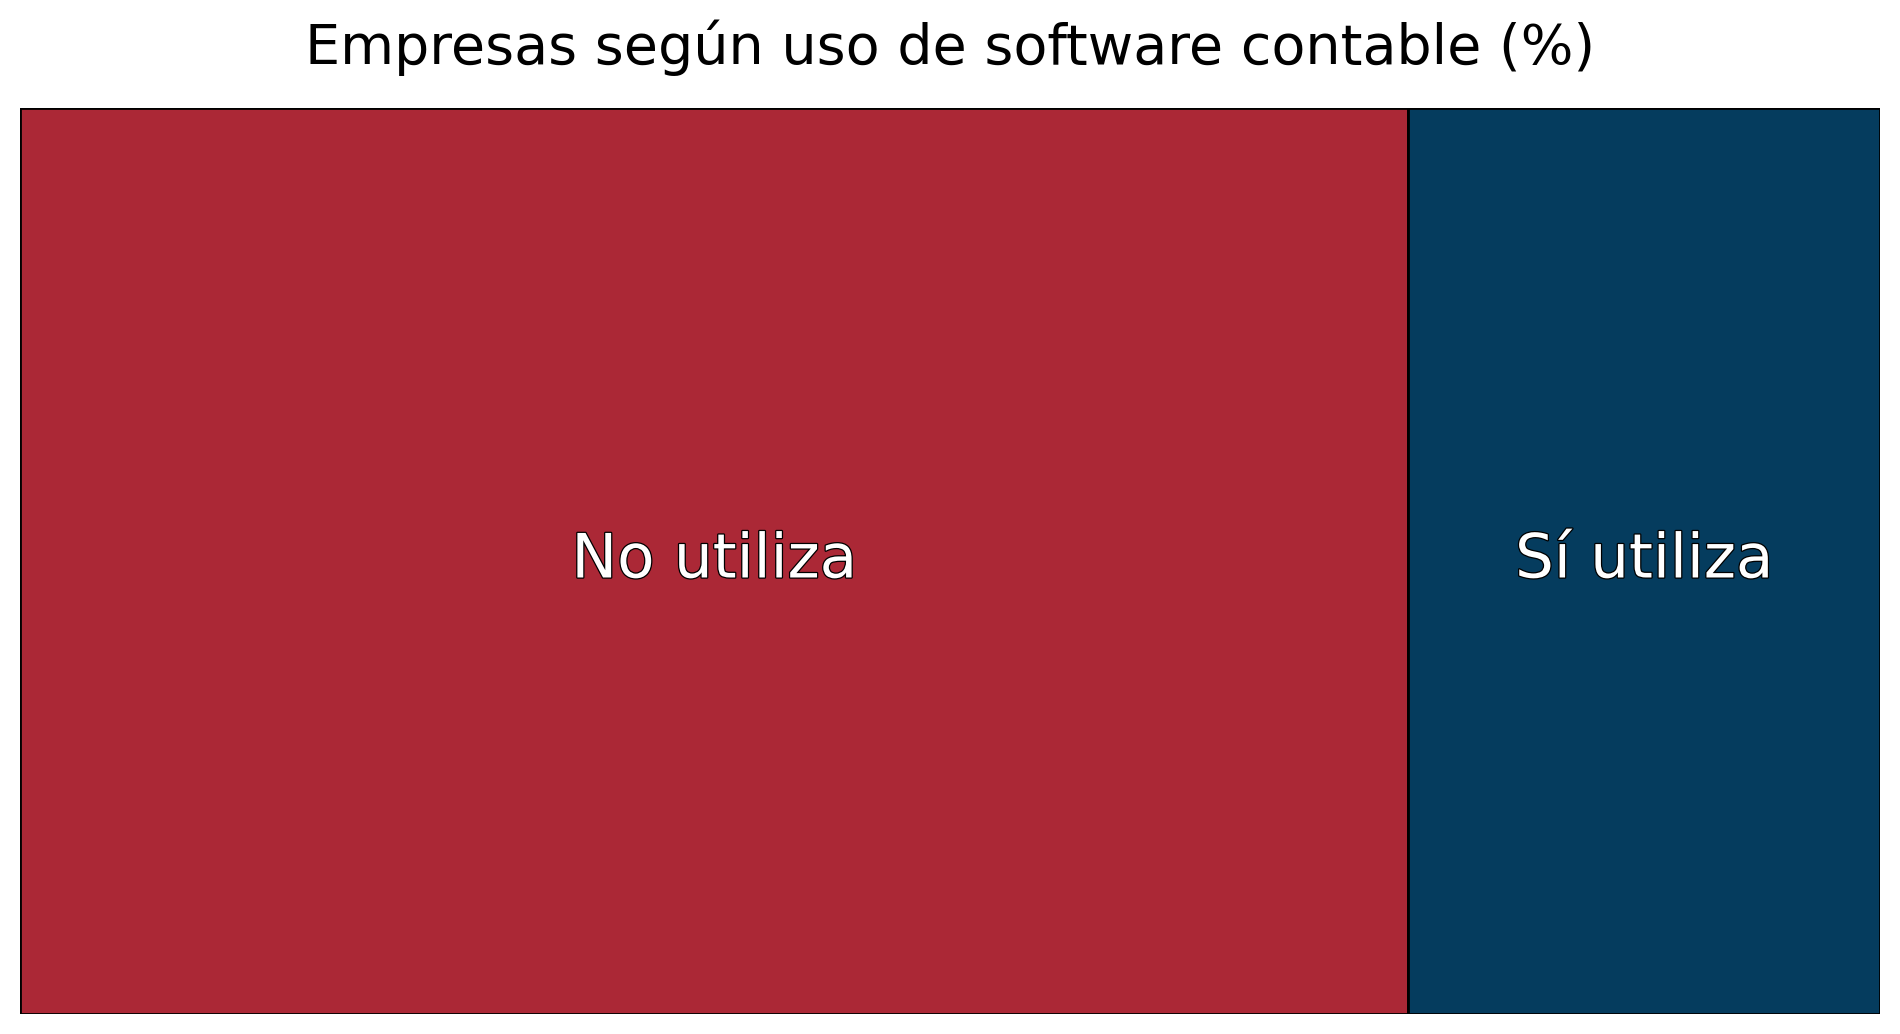

In [184]:
plottreebar(sizes=percentages_11, 
            label=percentages_11.index, 
            color=(palette[7], palette[0]), 
            sizes_list=[22, 22],
            title="Empresas según uso de software contable (%)")

El 75% de las empresa encuestadas no utilizan ningún tipo de software para llevar su contabilidad.

In [185]:
# Se toma la categoría de los que sí utilizan software 
# y se agrupan los valores
df_11_software = df_11.query("Utiliza_Software_Contable=='Sí'")
df_11_software = df_11_software.groupby("Nombre_Software").count()
# Se calculan los porcentajes por categoría
df_11_software = (df_11_software / df_11_software.sum())
df_11_software = df_11_software.sort_values(
                                            by="Utiliza_Software_Contable", 
                                            ascending=False)

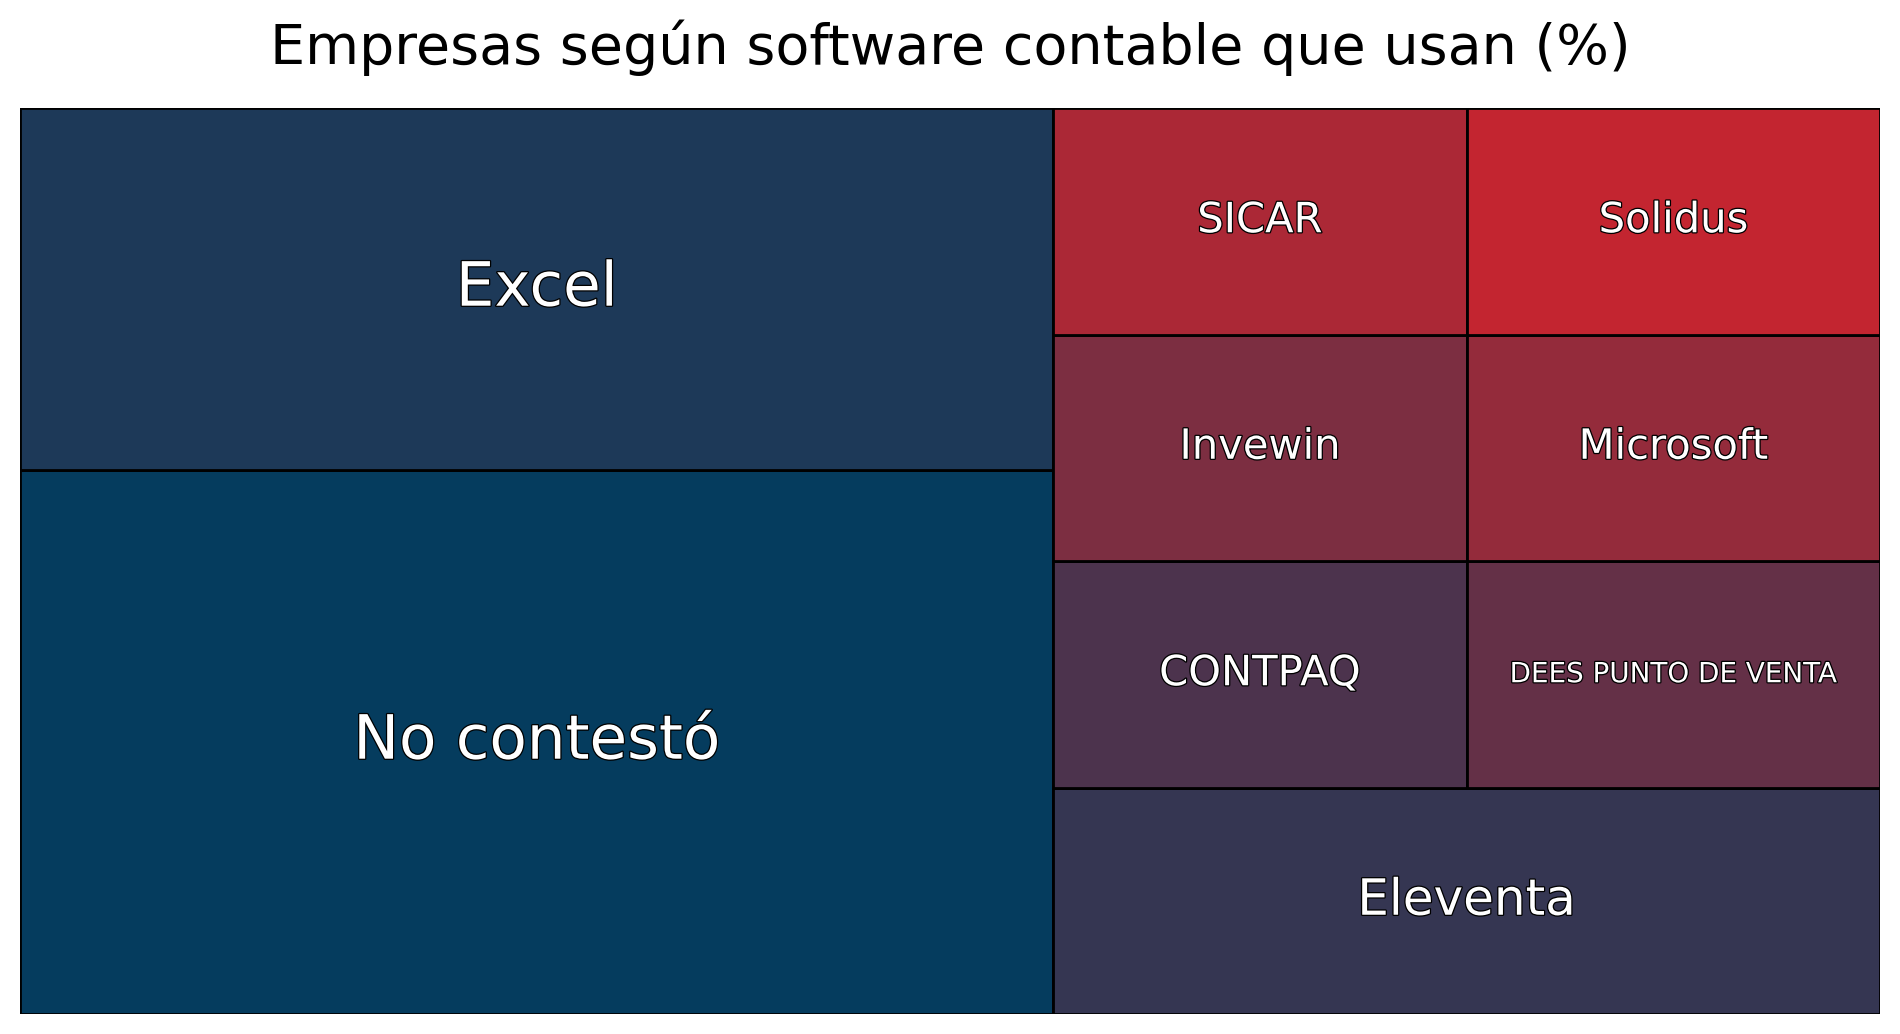

In [186]:
plottreebar(sizes=df_11_software.Utiliza_Software_Contable,
            label=df_11_software.index,
            color=palette,
            sizes_list=[22, 22, 18, 15, 10, 15, 15, 15],
            title="Empresas según software contable que usan (%)")

Del total de empresas, solo el 25% utilizan algún software contable. De estas, el 33% no especificó cuál utiliza. 
El software más utilizado es Excel con un 28% seguido de Eleventa con un 11%. El resto de softwares utilizados son Basico, CONTPAQ , DEES PUNTO DE VENTA, Invewin, SICAR, Solidus, cada uno de los cuales es utilizado por el 5.5% de las empresas.

Excel es, por lo tanto el software más utilizado para organizar la contabilidad de las empresas encuestadas, a pesar de no ser un software especializado en este tema.

### 14. Roles que se requiere que desempeñe el contador

In [187]:
rol = data_melt_group(df_14)
rol = rol.sort_values(by="Total", ascending=False)
percentages_14 = rol / len(df_14)

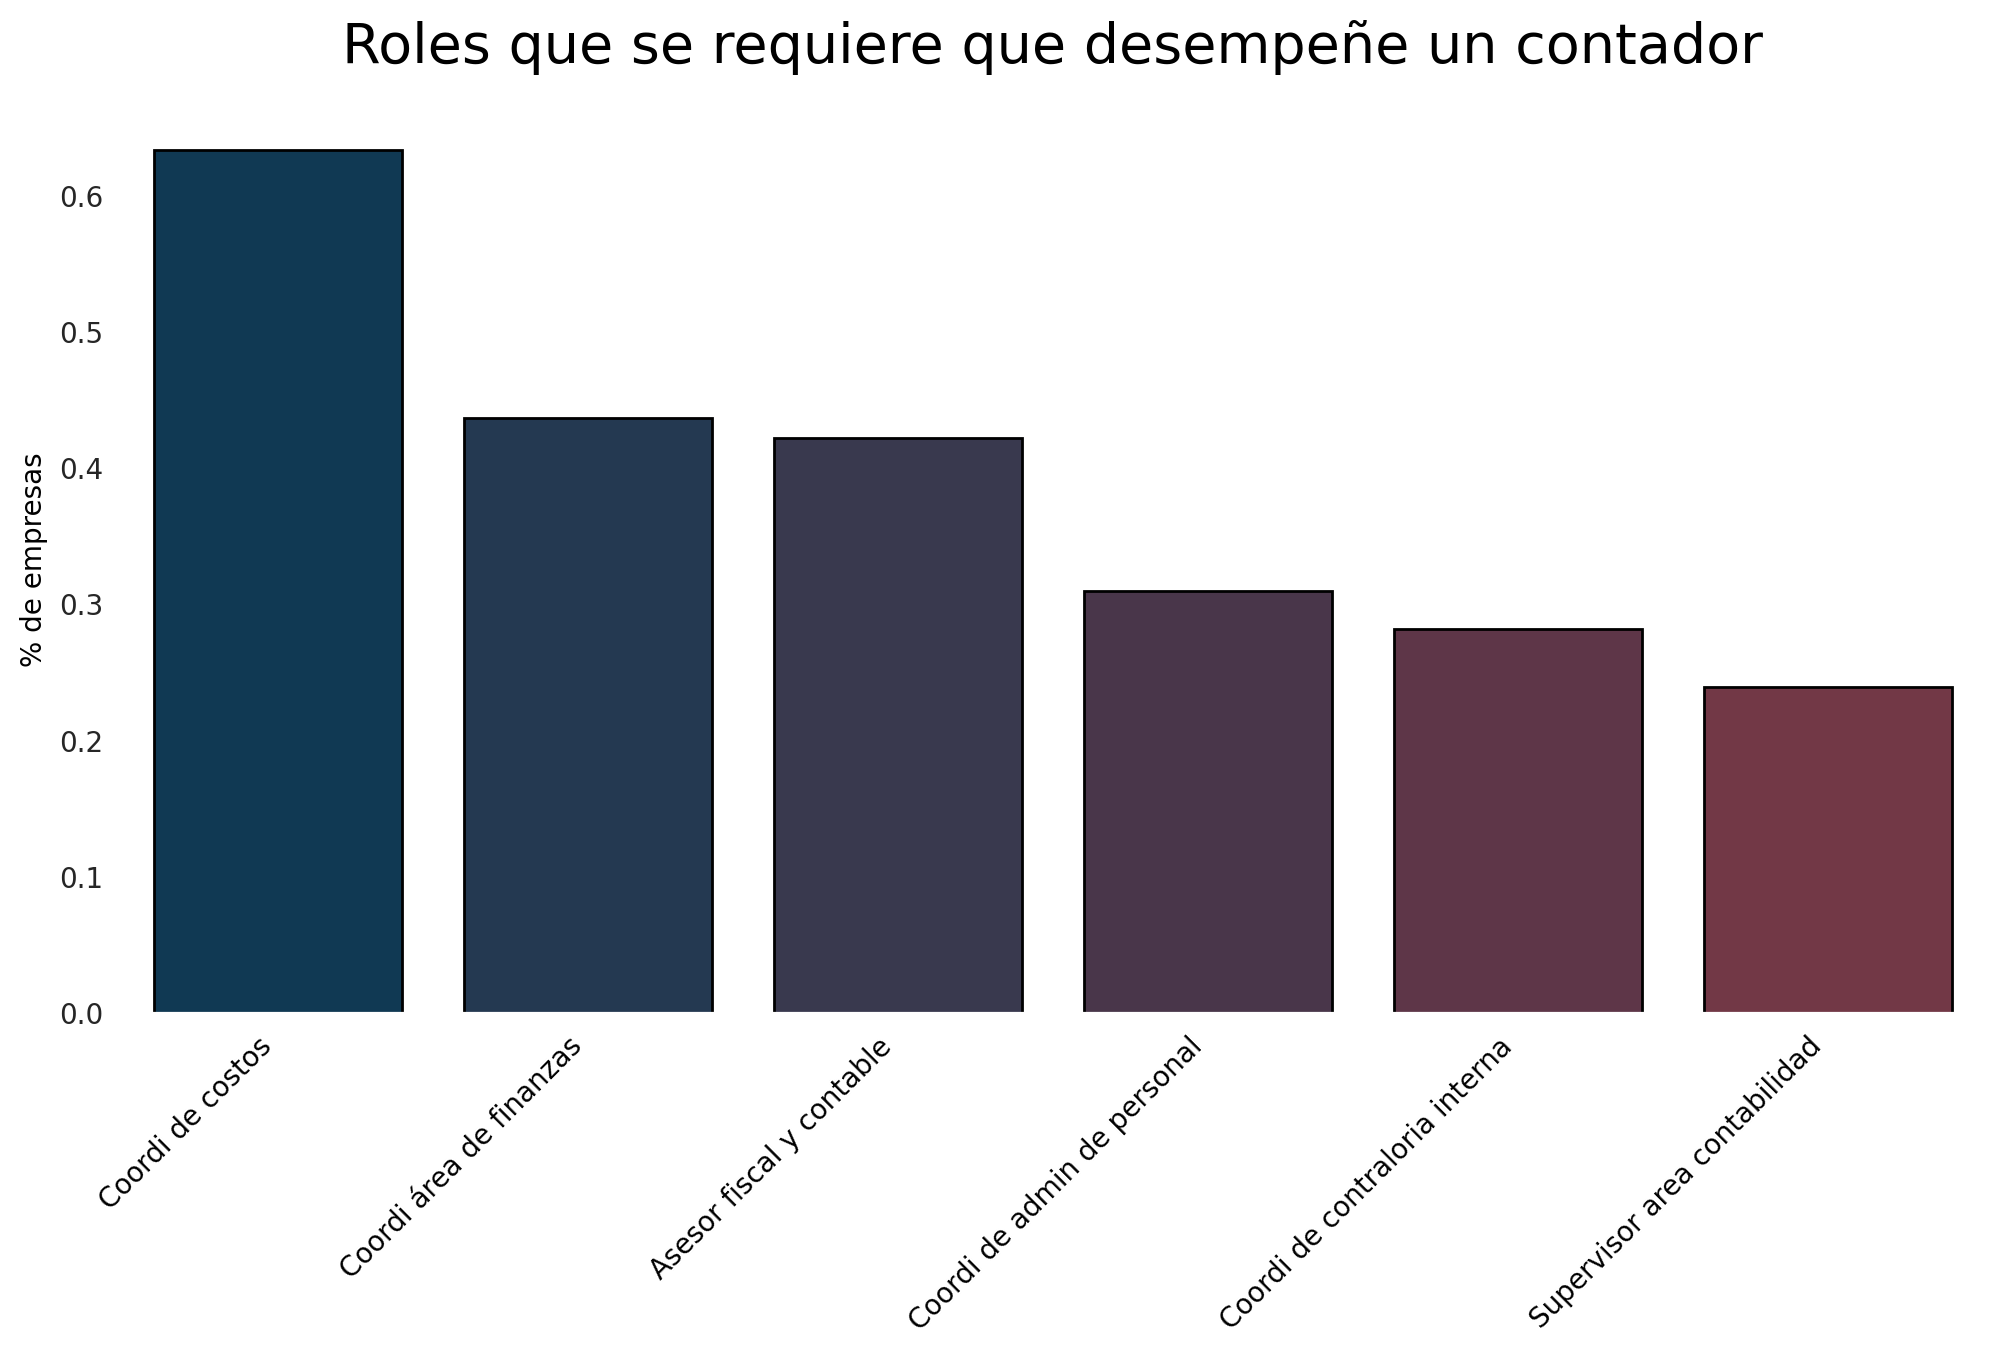

In [188]:
plotbar(x=percentages_14.index,
        y=percentages_14.Total,
        palette=palette,
        ylabel="% de empresas",
        xlabel="",
        rotation=45,
        ha="right",
        title="Roles que se requiere que desempeñe un contador")

El rol de supervisor del áerea de contabilidad es el más solicitado para los contadores (63%), seguido de coordinador del área de finanzas (44%) y asesor fiscal y contable (42%).

Aunque menos solicitados los roles de coordinador de costos (37%), coordinador de auditoria (31%), coordinador de administración de personal (28%) y coordinador de contraloría interna (24%), siguen siendo roles fuertemente valorados en las empresas.

### 15. Funciones pertenecientes al área contable que más se llevan a cabo en las empresas

In [189]:
funciones_del_contador = data_melt_group(df_15)
funciones_del_contador = funciones_del_contador.sort_values(by="Total", ascending=False)

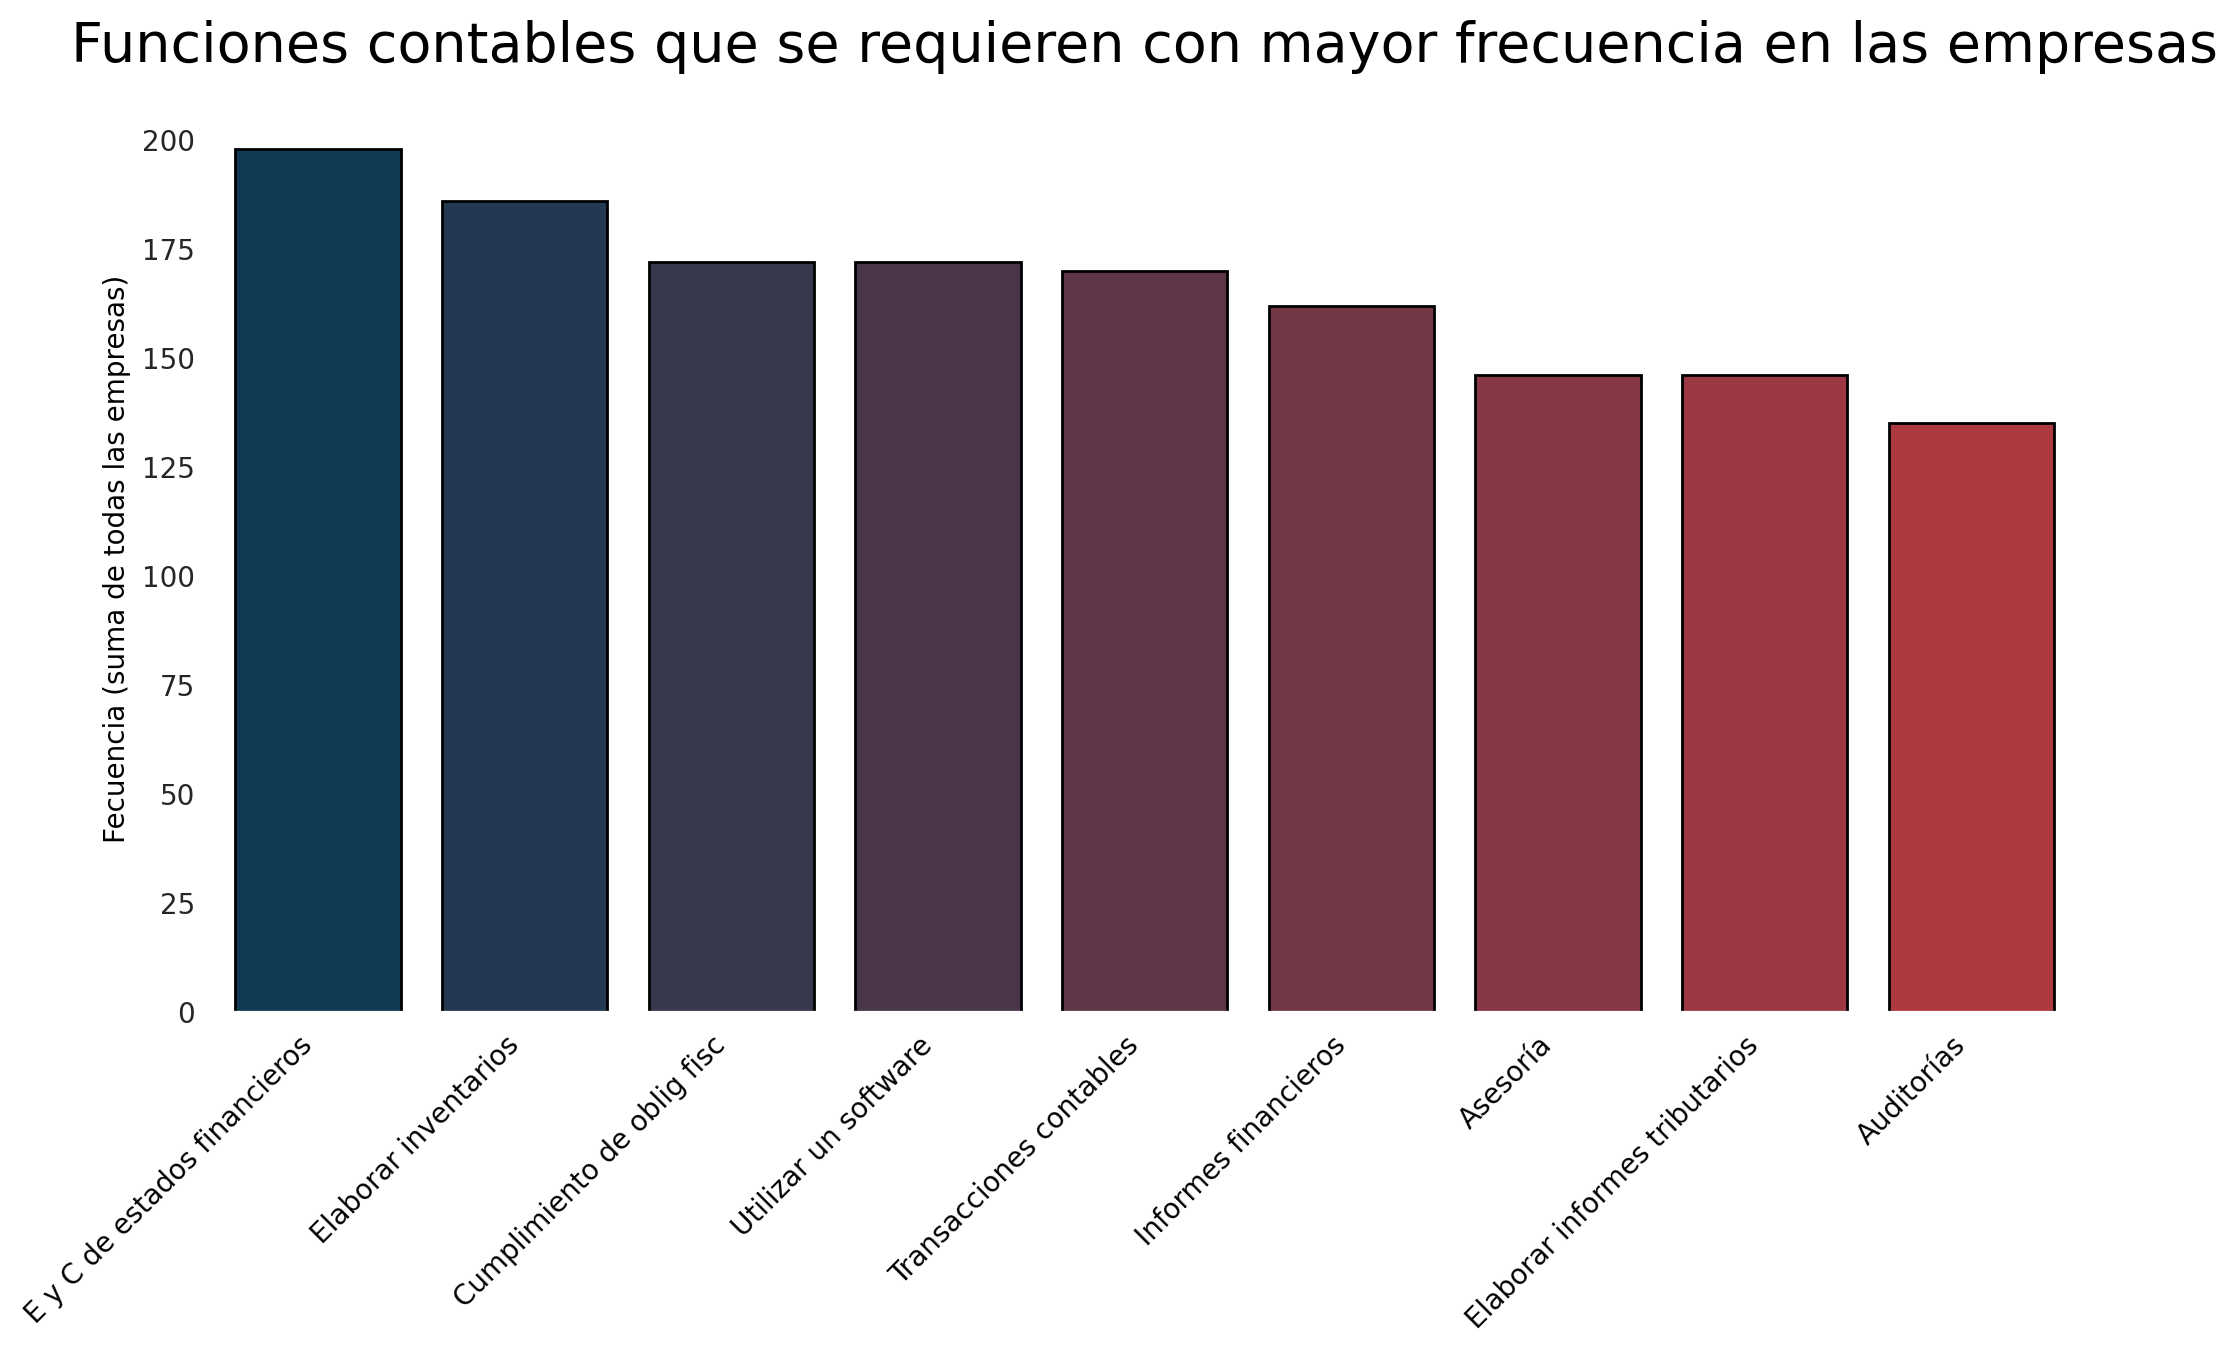

In [190]:
plotbar(x=funciones_del_contador.index,
        y=funciones_del_contador.Total,
        palette=palette,
        ylabel="Fecuencia (suma de todas las empresas)",
        xlabel="",
        rotation=45,
        ha="right",
        title="Funciones contables que se requieren con mayor frecuencia en las empresas")

Se observa que todas las actividades propuestas son requeridas con mucha frecuencia entre las empresas encuestadas, sin embargo, las principales son:
* Elaboración y control de estados financieros
* Elaboración de inventarios
* Cuplimiento de obligaciones fiscales 
* Manejo de software especializado
* Manejo de transacciones contables

Aunque las anteriores, son las funciones que con más frecuencia realizan en las empresas, es importante recalcar que el resto, también son altamente solicitadas. Esto significa que los TSU en el área de contabilidad deben tener una fuerte y variada formación técnica para poder satisfacer las necesidades de sus empleadores.

### 10.	Habilidades y actitudes que las empresas valoran del TSU en Contaduría Pública

In [191]:
# Se calculan los porcentajes por categoría
percentages_10 = data_melt_group(df_10)
percentages_10 = percentages_10 / len(df_10)
percentages_10 = percentages_10.drop(index="Otro")

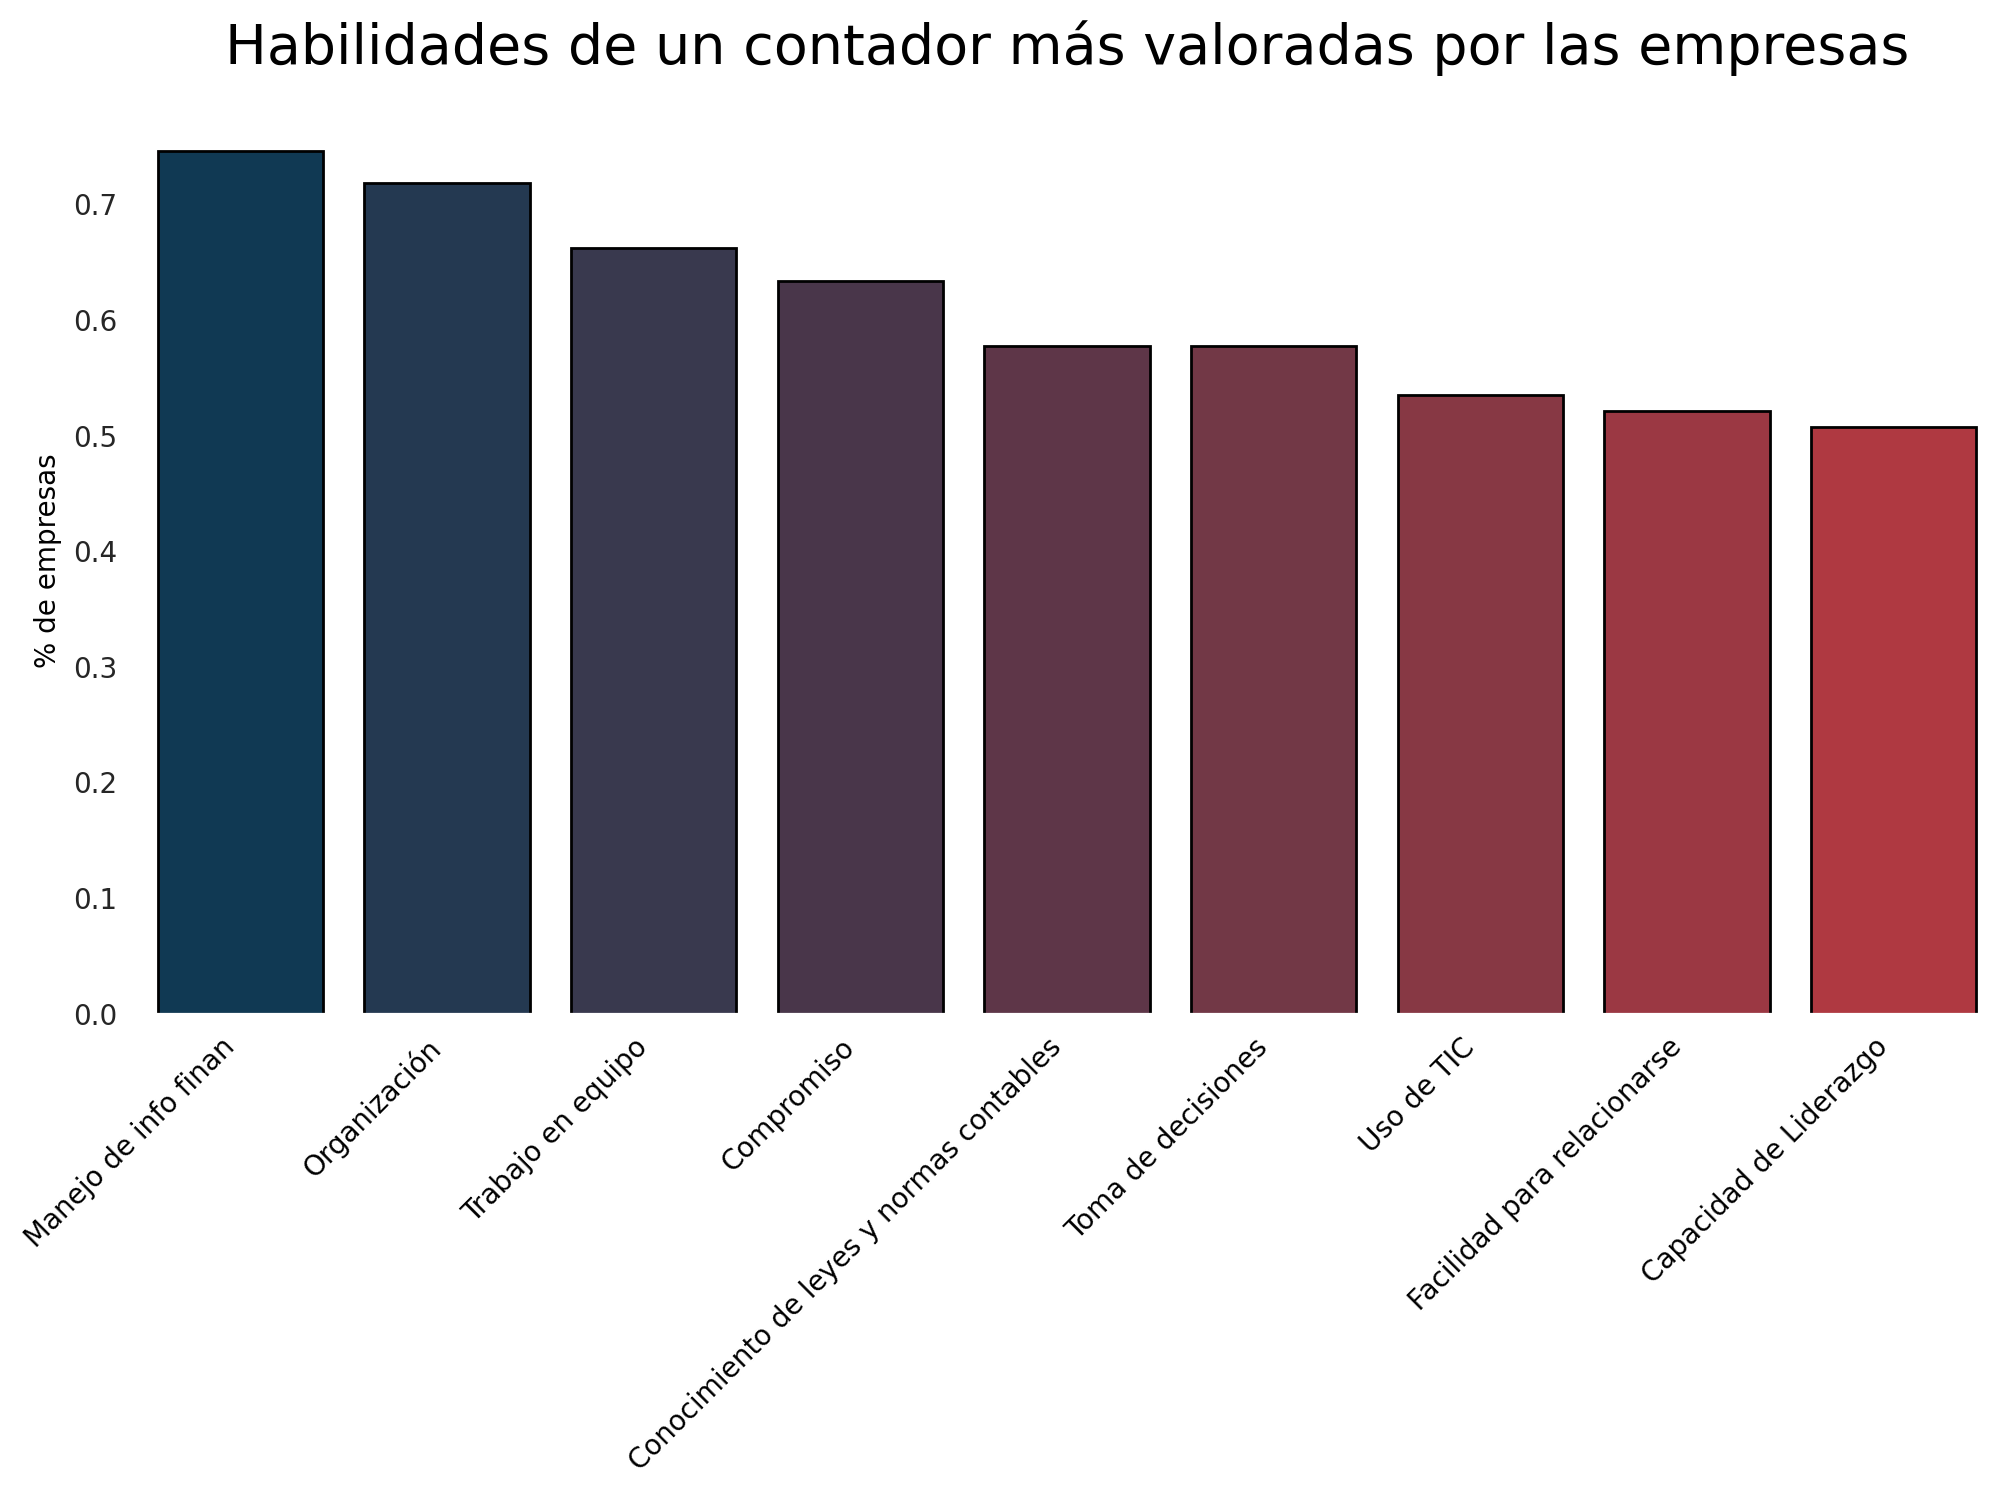

In [192]:
plotbar(x=percentages_10.index,
        y=percentages_10.Total,
        palette=palette,
        ylabel="% de empresas",
        xlabel="",
        rotation=45,
        ha="right",
        title="Habilidades de un contador más valoradas por las empresas")

El manejo de información financiera es la habilidad más valorada por las empresas encuestadas siendo nombrada por el 75% de estas. La organización es la segunda más valorada por un 72%, seguidas del trabajo en equipo (66%), compromiso (63%), conocimiento de las leyes y normas contables (58%), capacidad para la toma de decisiones (58%), Uso de TIC´s (54%), facilidad para ralacionarse (52%) y capacidad de liderazgo (50%).

Las habilidades duras, como lo son conocimientos técnicos, manejo de herramientas, etc., son tan valoradas como las habilidades blandas, es decir, habilidades que tienen que ver con el manejo de inteligencia emocional y capacidad para la interacción y colaboración como con otras personas.

### Conclusiones de la cuarta sección
Es importante que los TSU en contaduría, además de estar altamente capacitados en habilidades técnicas, también desarrollen habilidades blandas, como la capacidad de organización, trabajo en equipo, habilidad en la toma de decisiones y un fuerte compromiso por su trabajo, ya que, si bien las empresas necesitan un contador capaz y eficiente, que domine los temas propios de su puesto, lo que lo puede resultar como un factor diferenciador en el mercado laboral es la capacidad ejercer un fuerte liderazgo en los proyectos, así como un gran compromiso con la empresa con la que se trabaja.

# Conclusiones generales
Las empresas de la zona en la que se realizó el estudio, en su mayoría no cuentan con los servicios de un contador, pero valoran sus servicios y consideran que pueden aportar valor a la empresa. 

Existe una expectativa positiva de crecimiento en la zona en la que se realizó el estudio lo que significa que habrá empresas a crecer y con ello, abrir nuevas vacantes en distintas áreas.

El área relacionada a la contabilidad es una en la que existe una alta disposición a generar nuevos empleos, por lo que se espera que la demanda de contadores se incremente en el corto y mediano plazo.

Las habilidades esperadas de los contadores por parte de las empresas de la zona no se limitan únicamente a hablidades técnicas sino que se espera una formación integral que incluya un fuerte desarrollo de habilidades blandas que permita a los contadores saber colaborar con équipos de trabajo e incluso, liderarlos y organizarlos adecuadamente.

Por último, es importante remarcar el hecho de que aunque hay demanda de nuevos TSU en contaduría la mayoría de las empresas trabajan con contadores autónomos independientes, lo que significa que no se establece una relación contractual formal. 

In [193]:
# información sobre las librerías utilizadas en este proyecto
import session_info
session_info.show(html=False)

-----
matplotlib          3.4.3
nltk                3.6.5
numpy               1.20.3
pandas              1.4.2
seaborn             0.11.2
session_info        1.0.0
squarify            NA
wordcloud           1.9.2
-----
IPython             7.29.0
jupyter_client      6.1.12
jupyter_core        4.8.1
jupyterlab          3.2.1
notebook            6.4.5
-----
Python 3.9.7 (default, Sep 16 2021, 13:09:58) [GCC 7.5.0]
Linux-5.15.90.1-microsoft-standard-WSL2-x86_64-with-glibc2.31
-----
Session information updated at 2023-05-26 10:55
